# Notebook for a controlled Toggle switch Chemical Reaction Network

Toggle switch Chemical Reaction Network:

\begin{equation}
    \emptyset \xrightleftharpoons[\lambda_3]{\lambda_1} S_1 \quad
    \emptyset \xrightleftharpoons[\lambda_4]{\lambda_2} S_2
\end{equation}

Where:
\begin{align*}
\begin{array}{rlrl}
    \lambda_1(x;t,\theta,\xi) &= \theta_1 + \frac{\theta_3}{1+\theta_6(x_t^2)^{\theta_8}}  &
    \lambda_2(x;t,\theta,\xi) &= \theta_2 + \frac{\theta_4}{1+\theta_5(x_t^1)^{\theta_7}}  \\
    \lambda_3(x;t,\theta,\xi) &= \theta_9 x_t^1 & \lambda_4(x;t,\theta,\xi) &= \xi x_t^2
\end{array}
\end{align*}

In [1]:
import sys
sys.path.append('../')

import numpy as np
import torch
import matplotlib.pyplot as plt

import neuralnetwork
import convert_csv
import plot
import save_load_MDN
import simulation
import training_pgd

from CRN_controlled_toggle_switch import propensities_toggle_switch as propensities

## Importing data

In [2]:
FILE_NAME = 'data'
CRN_NAME = 'toggle'
NUM_PARAMS = 13

In [3]:
# loading data
X_train1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train1.csv')
X_train2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train2.csv')
X_train3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train3.csv')

y_train1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train1.csv')
y_train2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train2.csv')
y_train3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train3.csv')

X_valid1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid1.csv')
X_valid2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid2.csv')
X_valid3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid3.csv')

y_valid1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid1.csv')
y_valid2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid2.csv')
y_valid3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid3.csv')

X_test = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_test.csv')
y_test = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_test.csv')

train_data1 = [X_train1, y_train1]
valid_data1 = [X_valid1, y_valid1]
train_data2 = [X_train2, y_train2]
valid_data2 = [X_valid2, y_valid2]
train_data3 = [X_train3, y_train3]
valid_data3 = [X_valid3, y_valid3]

## Hyperparameters

In [4]:
LR = 0.001
N_ITER = 700
N_HIDDEN = 256
BATCHSIZE = 32
MIXTURE = 'NB'
N_COMPS = 4

## Training models

We train 3 different models to compare their accuracy.

In [153]:
model1 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS, n_hidden=N_HIDDEN, mixture=MIXTURE)
train_losses1, valid_losses1 = neuralnetwork.train_NN(model1, train_data1, valid_data1, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE)
model2 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS, n_hidden=N_HIDDEN, mixture=MIXTURE)
train_losses2, valid_losses2 = neuralnetwork.train_NN(model2, train_data2, valid_data2, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE)

Mixture Density Network created.


Training ...: 100%|█████████▉| 699/700 [1:05:31<00:05,  5.62s/it]  


Learning rate: 5.03550399738596e-09,
Train loss: 0.000786165299359709,
 Valid loss: 0.0009190693381242454
Mixture Density Network created.


Training ...: 100%|█████████▉| 699/700 [38:00<00:03,  3.26s/it]

Learning rate: 5.03550399738596e-09,
Train loss: 0.0007786803762428463,
 Valid loss: 0.0008633685065433383


In [11]:
model3 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS, n_hidden=N_HIDDEN, mixture=MIXTURE)
train_losses3, valid_losses3 = neuralnetwork.train_NN(model3, train_data3, valid_data3, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE)

Mixture Density Network created.


Training ...: 100%|█████████▉| 699/700 [44:45<00:03,  3.84s/it]

Learning rate: 5.03550399738596e-09,
Train loss: 0.0007593926857225597,
 Valid loss: 0.0009406656608916819


In [6]:
for i, model in enumerate([model1, model2, model3]):
    save_load_MDN.save_MDN_model(model, f'controlled_TS_model{i+1}.pt')

## Loading models

In [5]:
model1 = save_load_MDN.load_MDN_model('saved_models/controlled_TS_model1.pt')
model2 = save_load_MDN.load_MDN_model('saved_models/controlled_TS_model2.pt')
model3 = save_load_MDN.load_MDN_model('saved_models/controlled_TS_model3.pt')

Mixture Density Network created.
Mixture Density Network created.
Mixture Density Network created.


In [6]:
# Compute losses

print("Model")
print(f"KLD : {neuralnetwork.mean_loss(X_test, y_test, model1, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_test, y_test, model1, loss=neuralnetwork.loss_hellinger)}')

print("Model")
print(f"KLD : {neuralnetwork.mean_loss(X_test, y_test, model2, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_test, y_test, model2, loss=neuralnetwork.loss_hellinger)}')

print("Model")
print(f"KLD : {neuralnetwork.mean_loss(X_test, y_test, model3, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_test, y_test, model3, loss=neuralnetwork.loss_hellinger)}')


Model
KLD : 0.0009530445095151663
Hellinger : 0.014638759195804596
Model
KLD : 0.0009425547905266285
Hellinger : 0.014465397223830223
Model
KLD : 0.000997135299257934
Hellinger : 0.014645461924374104


## Probability mass function


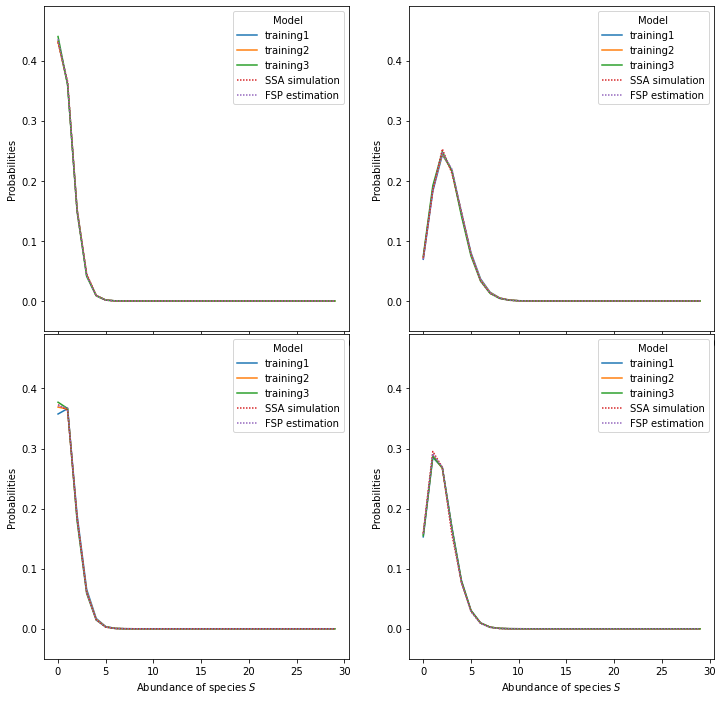

In [9]:
plot.multiple_plots(to_pred=[X_test[1_000+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound = 13*[30], 
                    time_windows = np.array([5, 10, 15, 20]),
                    n_comps=N_COMPS,
                    plot_test_result=(True, [y_test[1_000+k,:] for k in range(4)]), 
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv, 
                                    50, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    9, 
                                    1),
                    save=(False, 'CRN6_distr.pdf'))

## Sensitivity of the likelihood

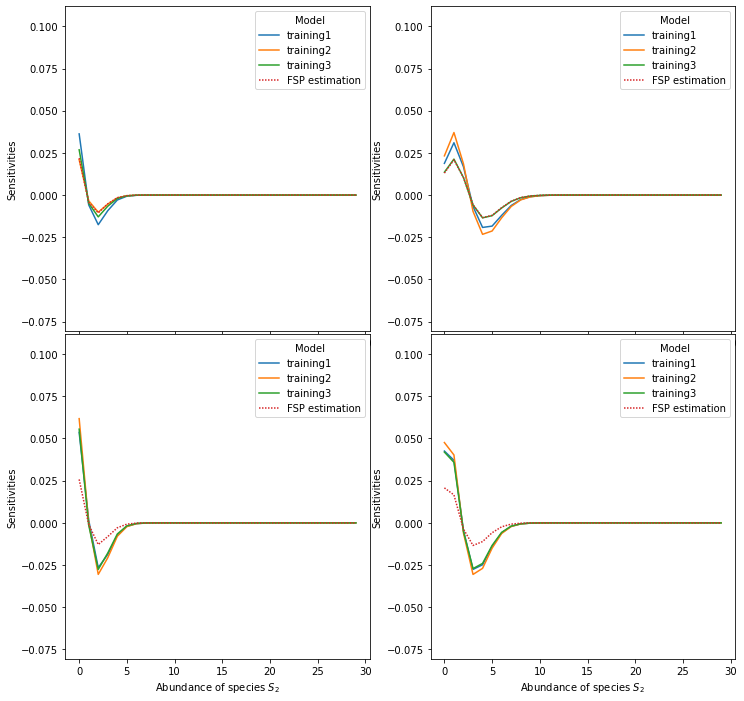

In [10]:
plot.multiple_plots(to_pred=[X_test[1_000+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound = [30]*4, 
                    n_comps=N_COMPS,
                    time_windows=np.array([5, 10, 15, 20]),
                    plot=('sensitivities', 0), 
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv, 
                                    50, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    9, 
                                    1),
                    index_names=('Sensitivities', r'Abundance of species $S_2$'),
                    save=(False, 'CRN6_stv1.pdf'))

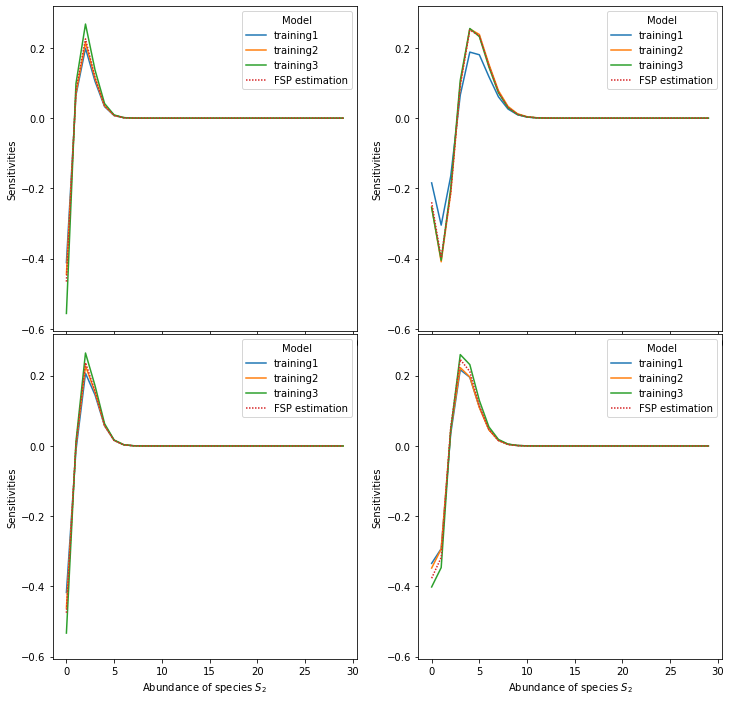

In [11]:
plot.multiple_plots(to_pred=[X_test[1_000+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound = [30]*4, 
                    n_comps=N_COMPS,
                    time_windows=np.array([5, 10, 15, 20]),
                    plot=('sensitivities', 1), 
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv, 
                                    50, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    9, 
                                    1),
                    index_names=('Sensitivities', r'Abundance of species $S_2$'),
                    save=(False, 'CRN6_stv2.pdf'))

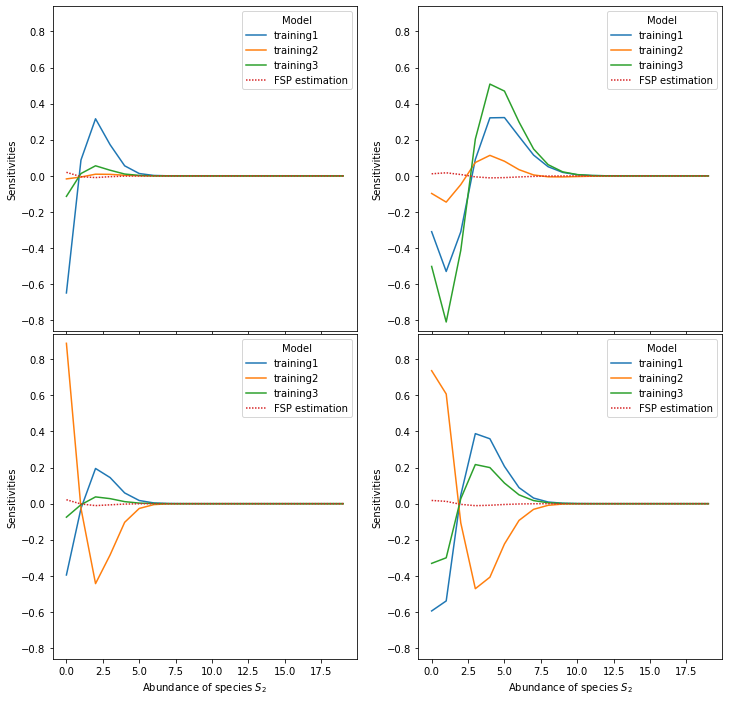

In [12]:
plot.multiple_plots(to_pred=[X_test[1_000+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound = [20]*4, 
                    n_comps=N_COMPS,
                    time_windows=np.array([5, 10, 15, 20]),
                    plot=('sensitivities', 2), 
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv, 
                                    50, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    9, 
                                    1),
                    index_names=('Sensitivities', r'Abundance of species $S_2$'),
                    save=(False, 'CRN6_stv3.pdf'))

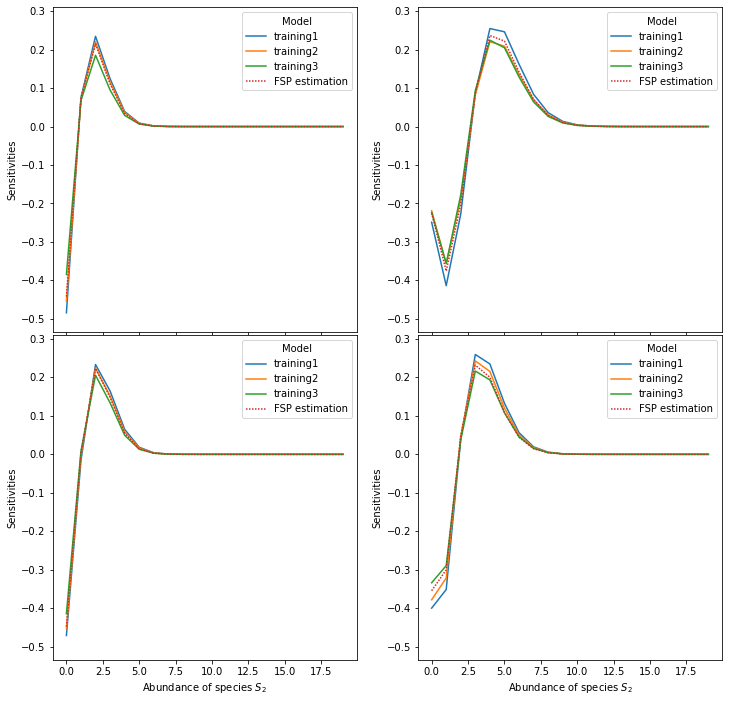

In [13]:
plot.multiple_plots(to_pred=[X_test[1_000+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound = [20]*4, 
                    n_comps=N_COMPS,
                    time_windows=np.array([5, 10, 15, 20]),
                    plot=('sensitivities', 3), 
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv, 
                                    50, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    9, 
                                    1),
                    index_names=('Sensitivities', r'Abundance of species $S_2$'),
                    save=(False, 'CRN6_stv4.pdf'))

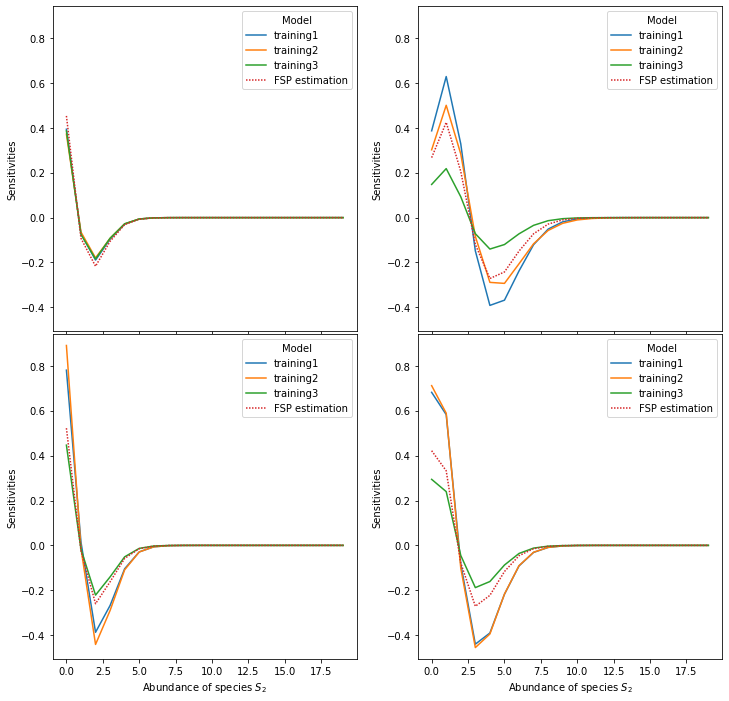

In [14]:
plot.multiple_plots(to_pred=[X_test[1_000+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound = [20]*4, 
                    n_comps=N_COMPS,
                    time_windows=np.array([5, 10, 15, 20]),
                    plot=('sensitivities', 4), 
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv, 
                                    50, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    9, 
                                    1),
                    index_names=('Sensitivities', r'Abundance of species $S_2$'),
                    save=(False, 'CRN6_stv5.pdf'))

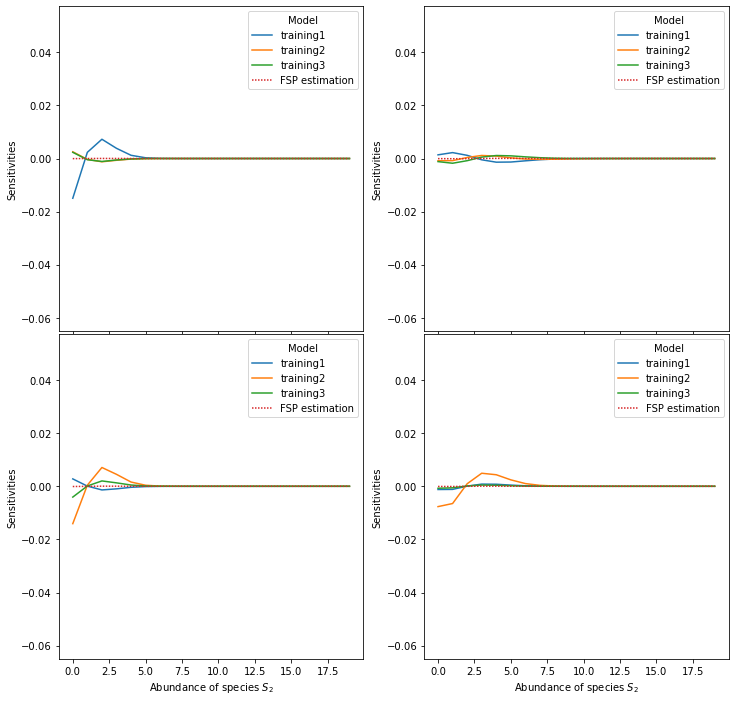

In [15]:
plot.multiple_plots(to_pred=[X_test[1_000+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound = [20]*4, 
                    n_comps=N_COMPS,
                    time_windows=np.array([5, 10, 15, 20]),
                    plot=('sensitivities', 5), 
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv, 
                                    50, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    9, 
                                    1),
                    index_names=('Sensitivities', r'Abundance of species $S_2$'),
                    save=(False, 'CRN6_stv6.pdf'))

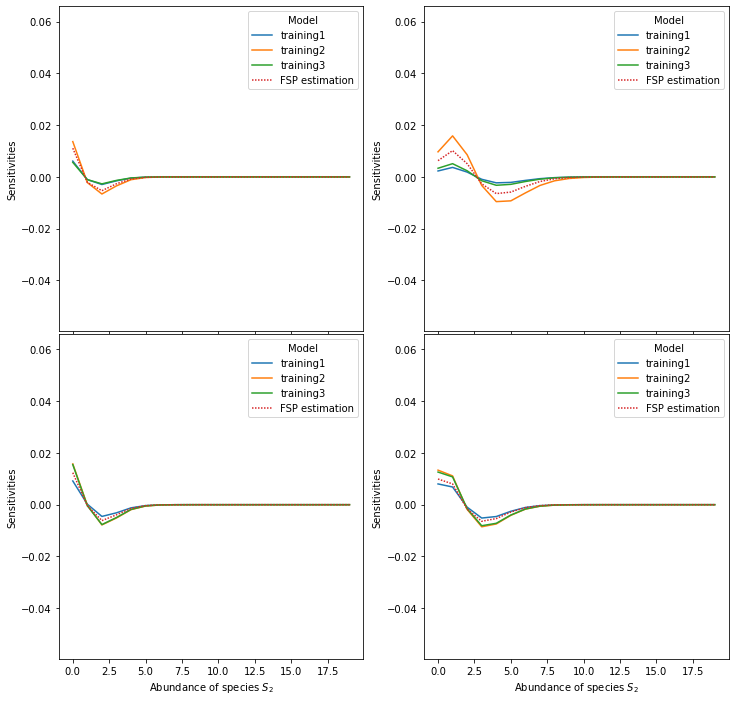

In [16]:
plot.multiple_plots(to_pred=[X_test[1_000+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound = [20]*4, 
                    n_comps=N_COMPS,
                    time_windows=np.array([5, 10, 15, 20]),
                    plot=('sensitivities', 6), 
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv, 
                                    50, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    9, 
                                    1),
                    index_names=('Sensitivities', r'Abundance of species $S_2$'),
                    save=(False, 'CRN6_stv7.pdf'))

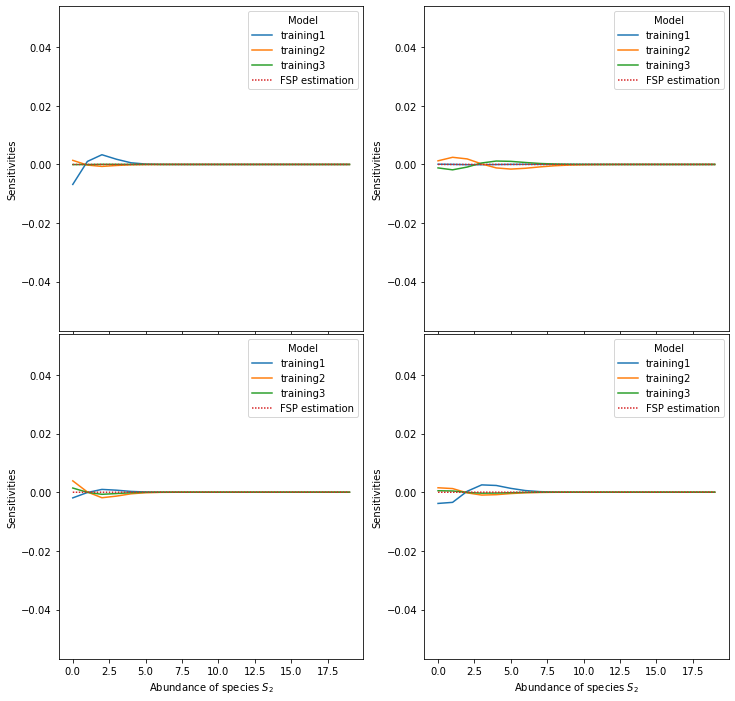

In [17]:
plot.multiple_plots(to_pred=[X_test[1_000+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound = [20]*4, 
                    n_comps=N_COMPS,
                    time_windows=np.array([5, 10, 15, 20]),
                    plot=('sensitivities', 7), 
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv, 
                                    400, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    9, 
                                    1),
                    index_names=('Sensitivities', r'Abundance of species $S_2$'),
                    save=(False, 'CRN6_stv8.pdf'))

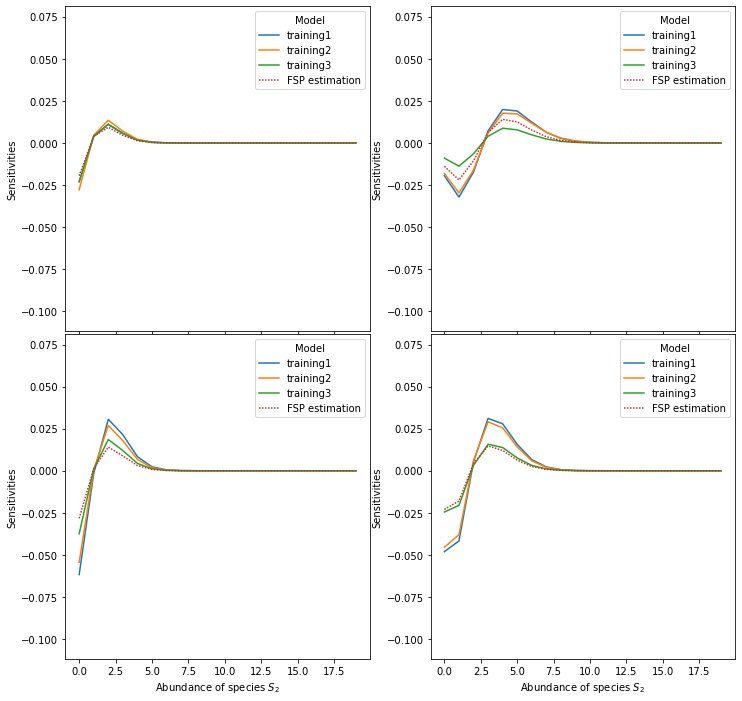

In [18]:
plot.multiple_plots(to_pred=[X_test[1_000+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound = [20]*4, 
                    n_comps=N_COMPS,
                    time_windows=np.array([5, 10, 15, 20]),
                    plot=('sensitivities', 8), 
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv, 
                                    50, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    9, 
                                    1),
                    index_names=('Sensitivities', r'Abundance of species $S_2$'),
                    save=(False, 'CRN6_stv9.pdf'))

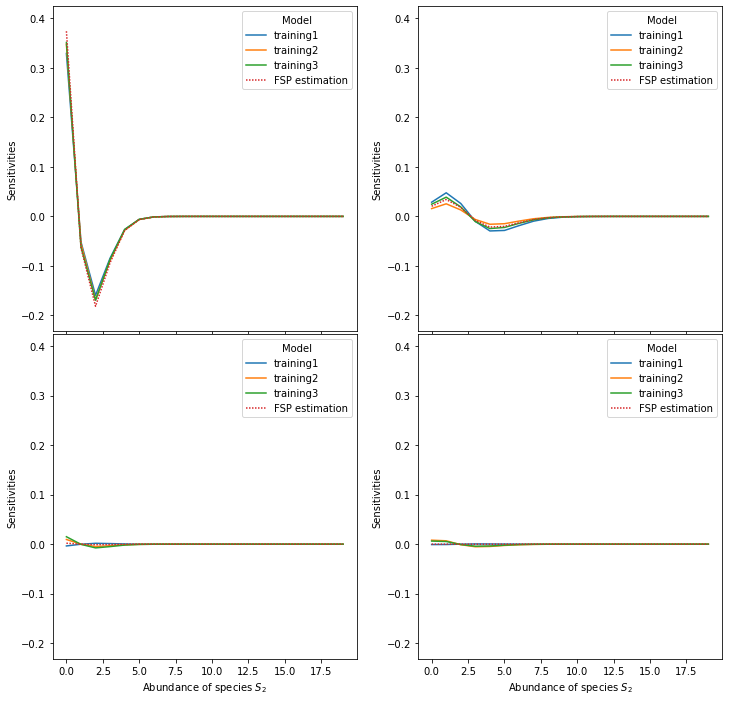

In [19]:
plot.multiple_plots(to_pred=[X_test[1_000+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound = [20]*4, 
                    n_comps=N_COMPS,
                    time_windows=np.array([5, 10, 15, 20]),
                    plot=('sensitivities', 9), 
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv, 
                                    50, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    9, 
                                    1),
                    index_names=('Sensitivities', r'Abundance of species $S_2$'),
                    save=(False, 'CRN6_stv10.pdf'))

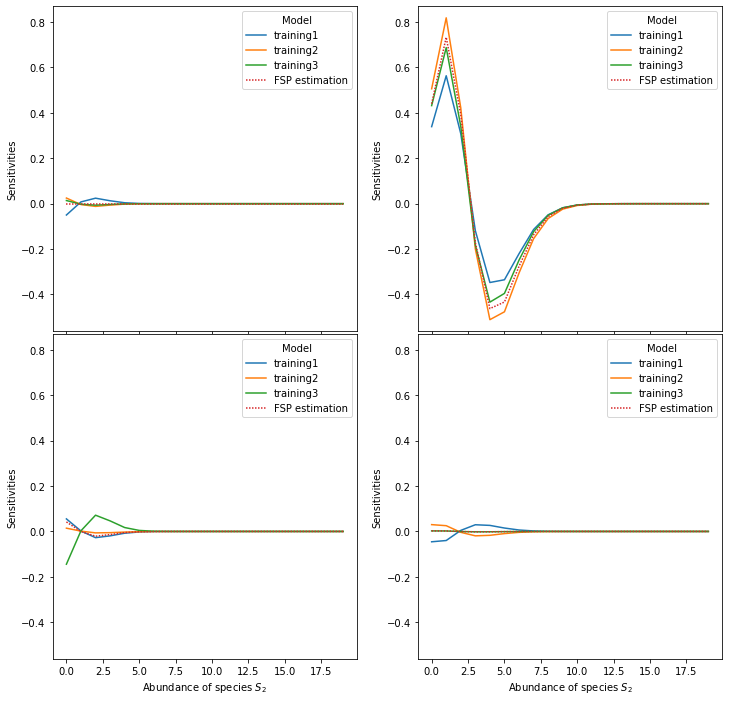

In [20]:
plot.multiple_plots(to_pred=[X_test[1_000+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound = [20]*4, 
                    n_comps=N_COMPS,
                    time_windows=np.array([5, 10, 15, 20]),
                    plot=('sensitivities', 10), 
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv, 
                                    50, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    9, 
                                    1),
                    index_names=('Sensitivities', r'Abundance of species $S_2$'),
                    save=(False, 'CRN6_stv11.pdf'))

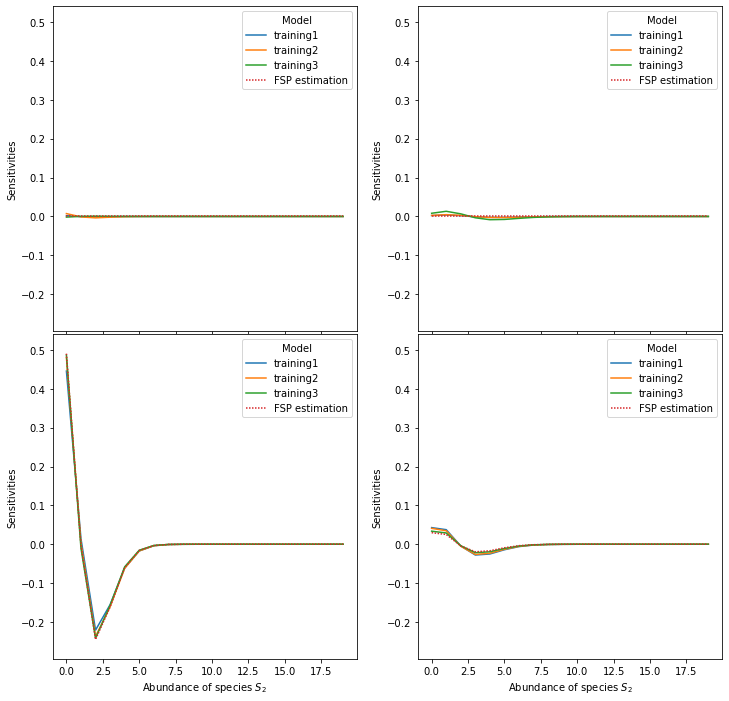

In [21]:
plot.multiple_plots(to_pred=[X_test[1_000+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound = [20]*4, 
                    n_comps=N_COMPS,
                    time_windows=np.array([5, 10, 15, 20]),
                    plot=('sensitivities', 11), 
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv, 
                                    50, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    9, 
                                    1),
                    index_names=('Sensitivities', r'Abundance of species $S_2$'),
                    save=(False, 'CRN6_stv12.pdf'))

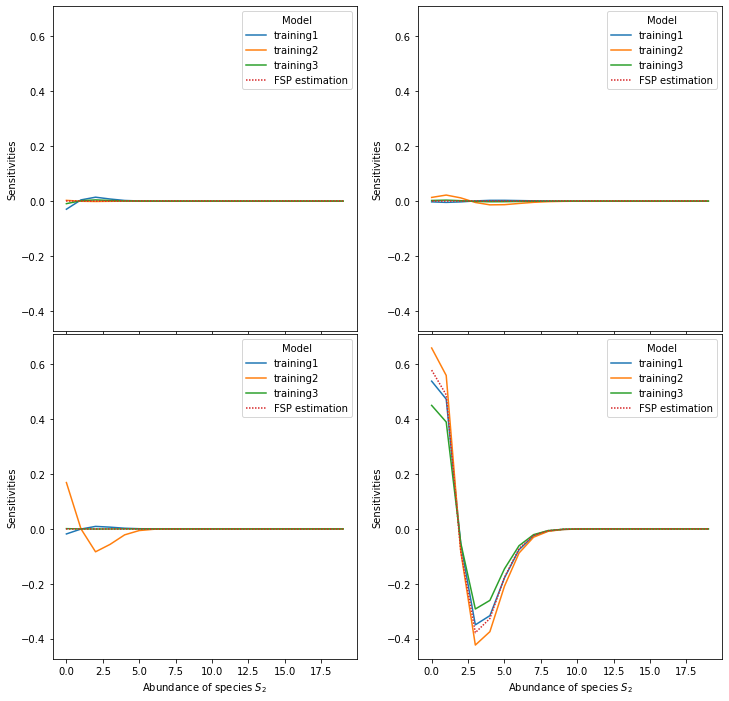

In [22]:
plot.multiple_plots(to_pred=[X_test[1_000+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound = [20]*4, 
                    n_comps=N_COMPS,
                    time_windows=np.array([5, 10, 15, 20]),
                    plot=('sensitivities', 12), 
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv, 
                                    50, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    9, 
                                    1),
                    index_names=('Sensitivities', r'Abundance of species $S_2$'),
                    save=(False, 'CRN6_stv13.pdf'))

## Fisher information

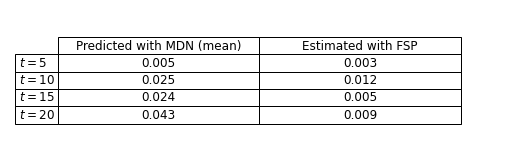

In [23]:
plot.fi_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000, 1:].numpy(), 
            ind_param=0,
            up_bound=200,
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv, 
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            9, 
                            1),
            save=(False, 'CRN6_FI_1.pdf'))

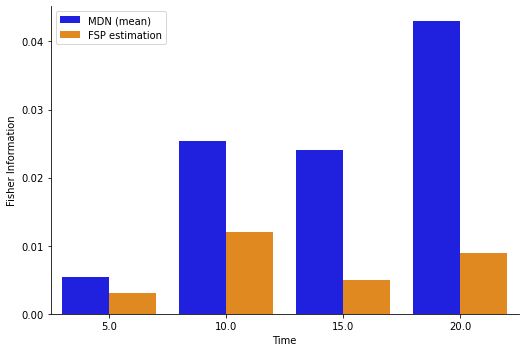

In [24]:
plot.fi_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000, 1:].numpy(), 
            ind_param=0,
            up_bound=200,
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv, 
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            9, 
                            1),
            save=(False, 'CRN6_FI_1.pdf'))

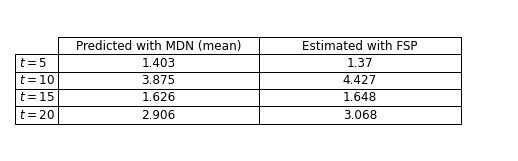

In [25]:
plot.fi_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000, 1:].numpy(), 
            ind_param=1,
            up_bound=200,
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv, 
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            9, 
                            1))

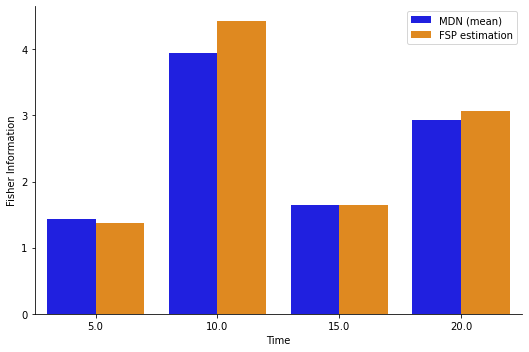

In [26]:
plot.fi_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000, 1:].numpy(), 
            ind_param=1,
            up_bound=200,
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv, 
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            9, 
                            1),
            save=(False, 'CRN6_FI_2.pdf'))

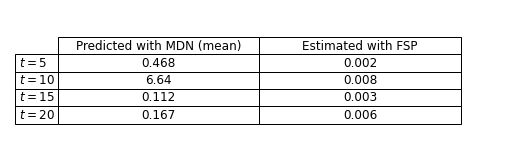

In [27]:
plot.fi_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000, 1:].numpy(), 
            ind_param=2,
            up_bound=200,
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv, 
                            400, 
                            propensities.init_state, 
                            propensities.ind_species,
                            9, 
                            1))

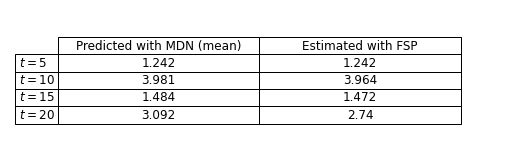

In [29]:
plot.fi_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000, 1:].numpy(), 
            ind_param=3,
            up_bound=200,
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv, 
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            9, 
                            1))

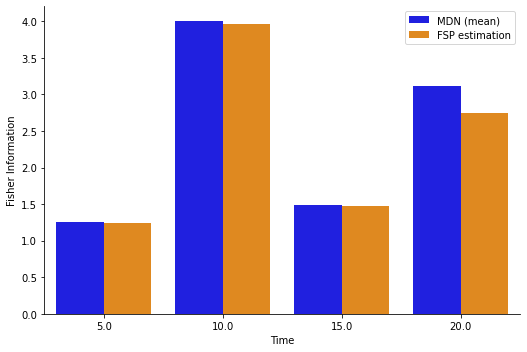

In [30]:
plot.fi_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000, 1:].numpy(), 
            ind_param=3,
            up_bound=200,
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv, 
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            9, 
                            1),
            save=(False, 'CRN6_FI_4.pdf'))

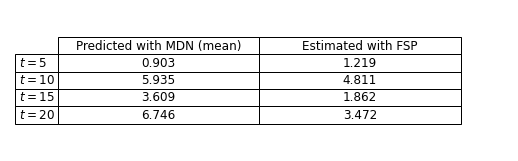

In [31]:
plot.fi_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000, 1:].numpy(), 
            ind_param=4,
            up_bound=200,
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv, 
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            9, 
                            1))

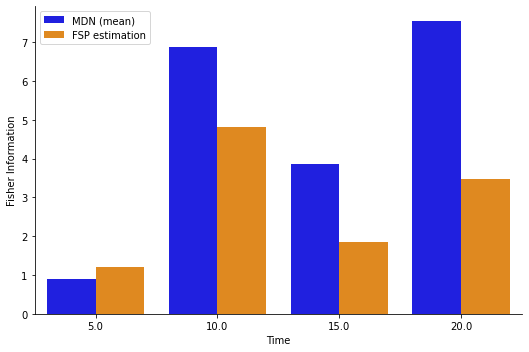

In [32]:
plot.fi_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000, 1:].numpy(), 
            ind_param=4,
            up_bound=200,
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv, 
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            9, 
                            1),
            save=(False, 'CRN6_FI_5.pdf'))

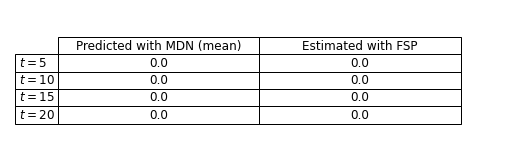

In [33]:
plot.fi_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000, 1:].numpy(), 
            ind_param=5,
            up_bound=200,
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv, 
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            9, 
                            1))

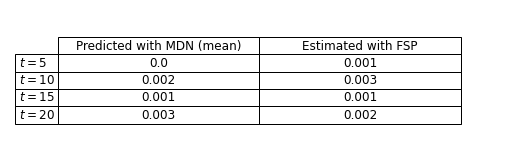

In [34]:
plot.fi_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000, 1:].numpy(), 
            ind_param=6,
            up_bound=200,
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv, 
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            9, 
                            1))

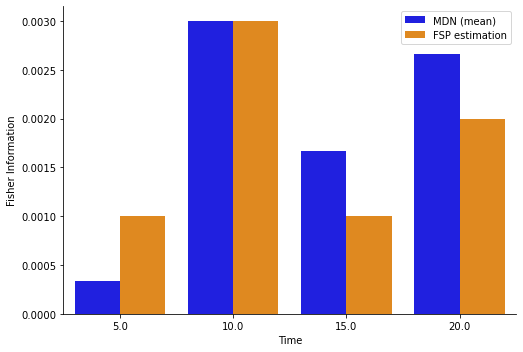

In [35]:
plot.fi_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000, 1:].numpy(), 
            ind_param=6,
            up_bound=200,
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv, 
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            9, 
                            1),
            save=(False, 'CRN6_FI_7.pdf'))

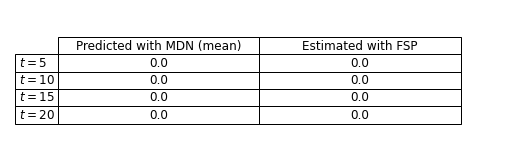

In [36]:
plot.fi_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000, 1:].numpy(), 
            ind_param=7,
            up_bound=200,
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv, 
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            9, 
                            1))

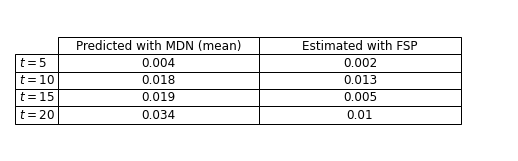

In [37]:
plot.fi_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000, 1:].numpy(), 
            ind_param=8,
            up_bound=200,
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv, 
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            9, 
                            1))

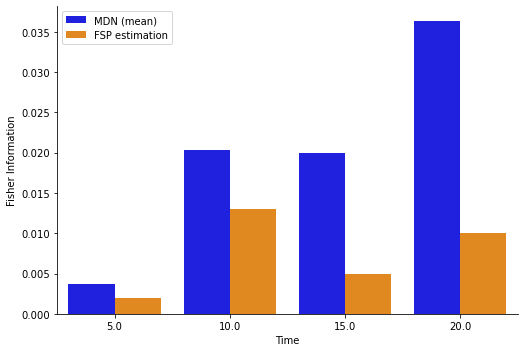

In [38]:
plot.fi_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000, 1:].numpy(), 
            ind_param=8,
            up_bound=200,
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv, 
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            9, 
                            1),
            save=(False, 'CRN6_FI_9.pdf'))

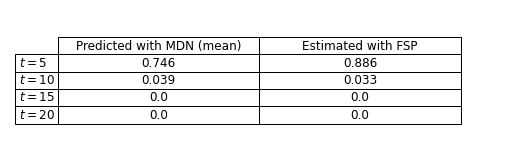

In [39]:
plot.fi_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000, 1:].numpy(), 
            ind_param=9,
            up_bound=200,
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv, 
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            9, 
                            1))

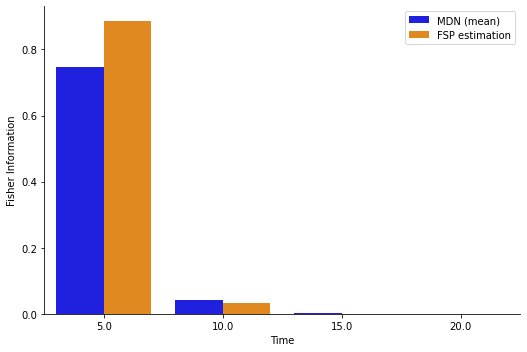

In [40]:
plot.fi_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000, 1:].numpy(), 
            ind_param=9,
            up_bound=200,
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv, 
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            9, 
                            1),
            save=(False, 'CRN6_FI_10.pdf'))

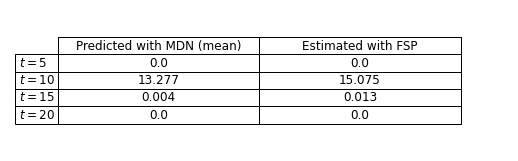

In [41]:
plot.fi_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000, 1:].numpy(), 
            ind_param=10,
            up_bound=200,
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv, 
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            9,
                            1))

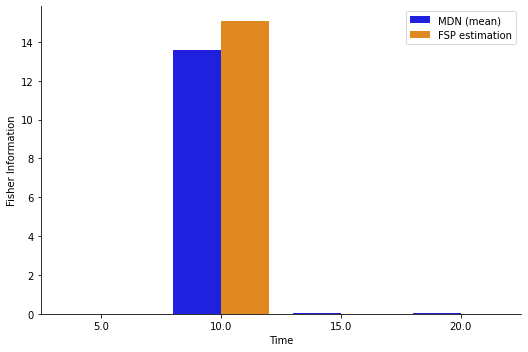

In [42]:
plot.fi_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000, 1:].numpy(), 
            ind_param=10,
            up_bound=200,
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv, 
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            9, 
                            1),
            save=(False, 'CRN6_FI_11.pdf'))

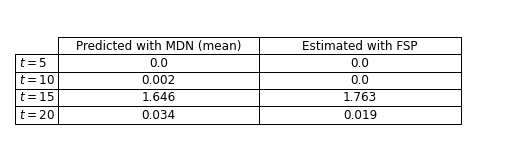

In [43]:
# gamma_y
plot.fi_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000, 1:].numpy(), 
            ind_param=11,
            up_bound=200,
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv, 
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            9, 
                            1))

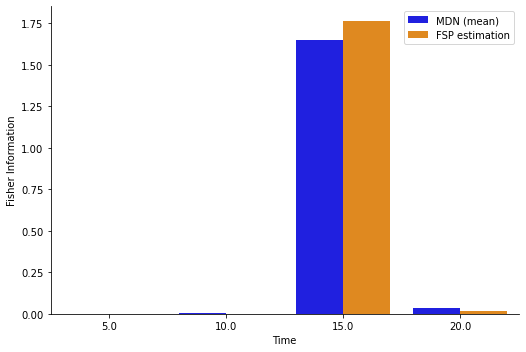

In [44]:
plot.fi_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000, 1:].numpy(), 
            ind_param=11,
            up_bound=200,
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv, 
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            9, 
                            1),
            save=(False, 'CRN6_FI_12.pdf'))

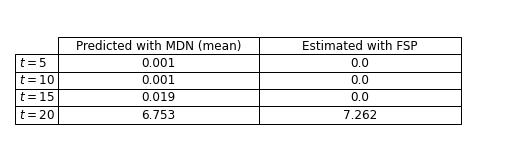

In [45]:
plot.fi_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000, 1:].numpy(), 
            ind_param=12,
            up_bound=200,
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv, 
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            9, 
                            1))

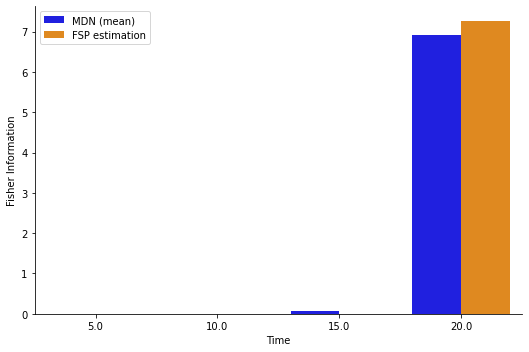

In [46]:
plot.fi_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000, 1:].numpy(), 
            ind_param=12,
            up_bound=200,
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv, 
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            9, 
                            1),
            save=(False, 'CRN6_FI_13.pdf'))

## Expectation

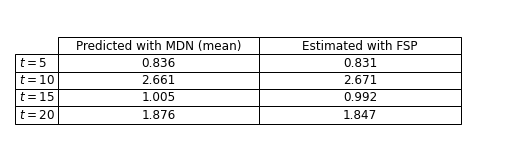

In [47]:
plot.expect_val_table(time_samples=np.array([5, 10, 15, 20]), 
                    params=X_test[1_000,1:].numpy(), 
                    time_windows=np.array([5, 10, 15, 20]),
                    models=(True, [model1, model2, model3], N_COMPS),
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv, 
                                    400, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    9, 
                                    1),
                    up_bound=200,
                    loss=None)

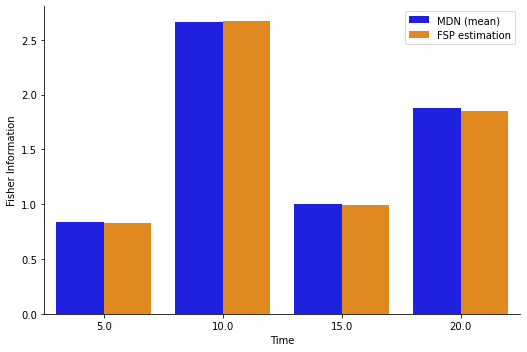

In [48]:
plot.expect_val_barplots(time_samples=np.array([5, 10, 15, 20]), 
                        params=X_test[1_000,1:].numpy(), 
                        time_windows=np.array([5, 10, 15, 20]),
                        models=(True, [model1, model2, model3], N_COMPS),
                        plot_fsp_result=(True, 
                                        propensities.stoich_mat, 
                                        propensities.propensities, 
                                        propensities.propensities_drv, 
                                        400, 
                                        propensities.init_state, 
                                        propensities.ind_species, 
                                        9, 
                                        1),
                        up_bound=200,
                        loss=None,
                        save=(False, 'CRN6_expectval.pdf'))

## Gradient of expectation

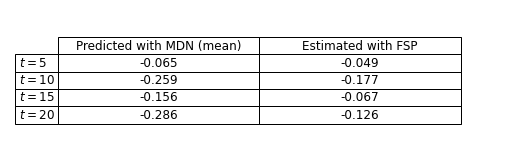

In [49]:
plot.expect_val_table(time_samples=np.array([5, 10, 15, 20]), 
                    params=X_test[1_000,1:].numpy(), 
                    time_windows=np.array([5, 10, 15, 20]),
                    models=(True, [model1, model2, model3], N_COMPS),
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv, 
                                    400, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    9, 
                                    1),
                    up_bound=200,
                    loss=None,
                    plot=('gradient', 0))

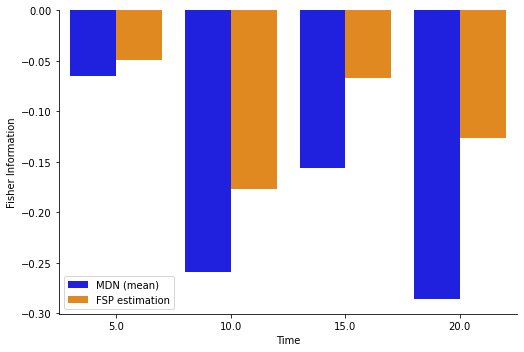

In [50]:
plot.expect_val_barplots(time_samples=np.array([5, 10, 15, 20]), 
                        params=X_test[1_000,1:].numpy(), 
                        time_windows=np.array([5, 10, 15, 20]),
                        models=(True, [model1, model2, model3], N_COMPS),
                        plot_fsp_result=(True, 
                                        propensities.stoich_mat, 
                                        propensities.propensities, 
                                        propensities.propensities_drv, 
                                        400, 
                                        propensities.init_state, 
                                        propensities.ind_species, 
                                        9, 
                                        1),
                        up_bound=200,
                        loss=None,
                        plot=('gradient', 0),
                        save=(False, 'CRN6_gradient1.pdf'))

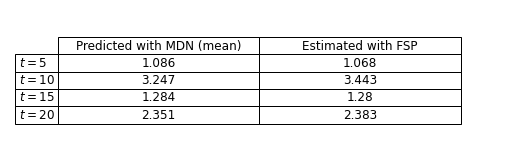

In [51]:
plot.expect_val_table(time_samples=np.array([5, 10, 15, 20]), 
                    params=X_test[1_000,1:].numpy(), 
                    time_windows=np.array([5, 10, 15, 20]),
                    models=(True, [model1, model2, model3], N_COMPS),
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv, 
                                    400, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    9, 
                                    1),
                    up_bound=200,
                    loss=None,
                    plot=('gradient', 1))

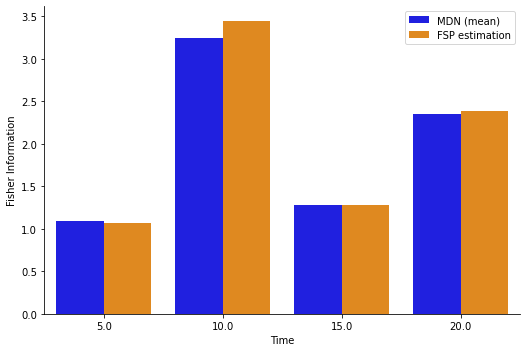

In [52]:
plot.expect_val_barplots(time_samples=np.array([5, 10, 15, 20]), 
                        params=X_test[1_000,1:].numpy(), 
                        time_windows=np.array([5, 10, 15, 20]),
                        models=(True, [model1, model2, model3], N_COMPS),
                        plot_fsp_result=(True, 
                                        propensities.stoich_mat, 
                                        propensities.propensities, 
                                        propensities.propensities_drv, 
                                        400, 
                                        propensities.init_state, 
                                        propensities.ind_species, 
                                        9, 
                                        1),
                        up_bound=200,
                        loss=None,
                        plot=('gradient', 1),
                        save=(False, 'CRN6_gradient2.pdf'))

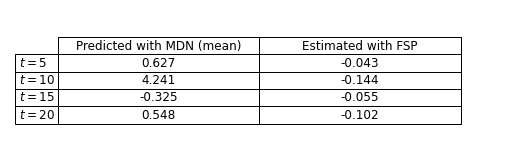

In [53]:
plot.expect_val_table(time_samples=np.array([5, 10, 15, 20]), 
                    params=X_test[1_000,1:].numpy(), 
                    time_windows=np.array([5, 10, 15, 20]),
                    models=(True, [model1, model2, model3], N_COMPS),
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv, 
                                    400, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    9, 
                                    1),
                    up_bound=200,
                    loss=None,
                    plot=('gradient', 2))

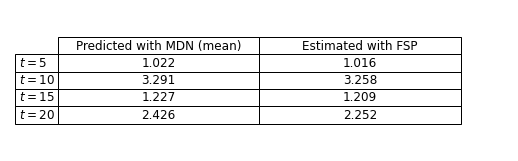

In [55]:
plot.expect_val_table(time_samples=np.array([5, 10, 15, 20]), 
                    params=X_test[1_000,1:].numpy(), 
                    time_windows=np.array([5, 10, 15, 20]),
                    models=(True, [model1, model2, model3], N_COMPS),
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv, 
                                    400, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    9, 
                                    1),
                    up_bound=200,
                    loss=None,
                    plot=('gradient', 3))

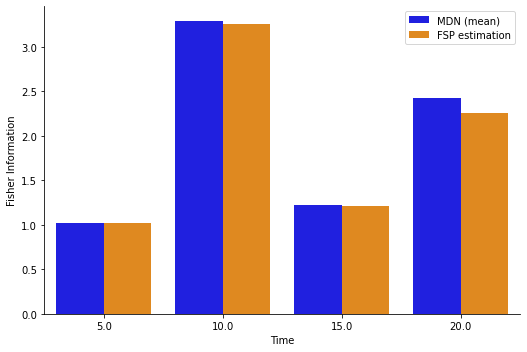

In [56]:
plot.expect_val_barplots(time_samples=np.array([5, 10, 15, 20]), 
                    params=X_test[1_000,1:].numpy(), 
                    time_windows=np.array([5, 10, 15, 20]),
                    models=(True, [model1, model2, model3], N_COMPS),
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv, 
                                    400, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    9, 
                                    1),
                    up_bound=200,
                    loss=None,
                    plot=('gradient', 3),
                    save=(False, 'CRN6_gradient4.pdf'))

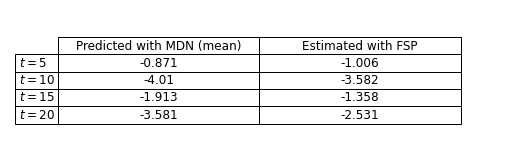

In [57]:
plot.expect_val_table(time_samples=np.array([5, 10, 15, 20]), 
                    params=X_test[1_000,1:].numpy(), 
                    time_windows=np.array([5, 10, 15, 20]),
                    models=(True, [model1, model2, model3], N_COMPS),
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv, 
                                    400, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    9, 
                                    1),
                    up_bound=200,
                    loss=None,
                    plot=('gradient', 4))

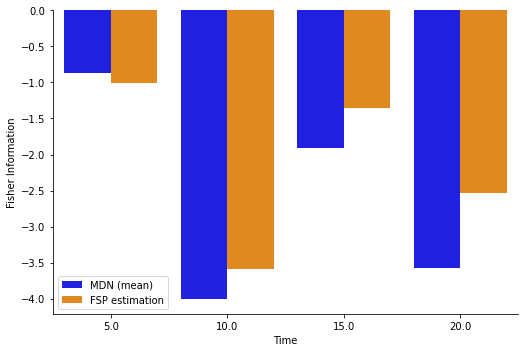

In [58]:
plot.expect_val_barplots(time_samples=np.array([5, 10, 15, 20]), 
                    params=X_test[1_000,1:].numpy(), 
                    time_windows=np.array([5, 10, 15, 20]),
                    models=(True, [model1, model2, model3], N_COMPS),
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv, 
                                    400, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    9, 
                                    1),
                    up_bound=200,
                    loss=None,
                    plot=('gradient', 4),
                    save=(False, 'CRN6_gradient5.pdf'))

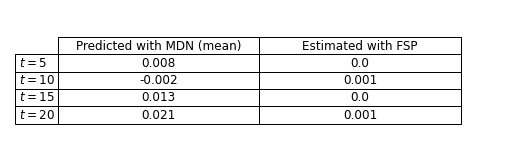

In [59]:
plot.expect_val_table(time_samples=np.array([5, 10, 15, 20]), 
                    params=X_test[1_000,1:].numpy(), 
                    time_windows=np.array([5, 10, 15, 20]),
                    models=(True, [model1, model2, model3], N_COMPS),
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv, 
                                    400, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    9, 
                                    1),
                    up_bound=200,
                    loss=None,
                    plot=('gradient', 5))

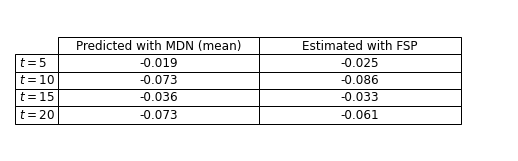

In [61]:
plot.expect_val_table(time_samples=np.array([5, 10, 15, 20]), 
                    params=X_test[1_000,1:].numpy(), 
                    time_windows=np.array([5, 10, 15, 20]),
                    models=(True, [model1, model2, model3], N_COMPS),
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv, 
                                    400, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    9, 
                                    1),
                    up_bound=200,
                    loss=None,
                    plot=('gradient', 6))

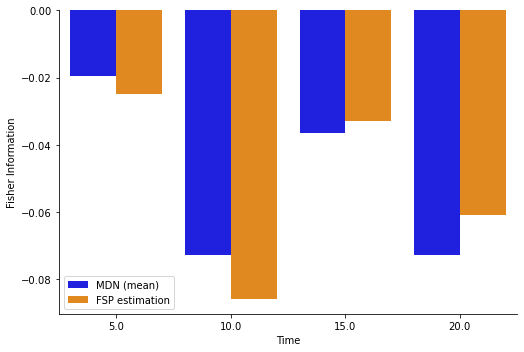

In [62]:
plot.expect_val_barplots(time_samples=np.array([5, 10, 15, 20]), 
                        params=X_test[1_000,1:].numpy(), 
                        time_windows=np.array([5, 10, 15, 20]),
                        models=(True, [model1, model2, model3], N_COMPS),
                        plot_fsp_result=(True, 
                                        propensities.stoich_mat, 
                                        propensities.propensities, 
                                        propensities.propensities_drv, 
                                        400, 
                                        propensities.init_state, 
                                        propensities.ind_species, 
                                        9, 
                                        1),
                        up_bound=200,
                        loss=None,
                        plot=('gradient', 6),
                        save=(False, 'CRN6_gradient7.pdf'))

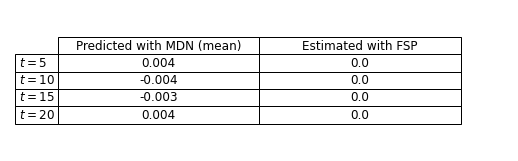

In [63]:
plot.expect_val_table(time_samples=np.array([5, 10, 15, 20]), 
                    params=X_test[1_000,1:].numpy(), 
                    time_windows=np.array([5, 10, 15, 20]),
                    models=(True, [model1, model2, model3], N_COMPS),
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv, 
                                    400, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    9, 
                                    1),
                    up_bound=200,
                    loss=None,
                    plot=('gradient', 7))

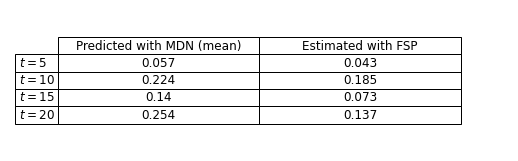

In [64]:
plot.expect_val_table(time_samples=np.array([5, 10, 15, 20]), 
                    params=X_test[1_000,1:].numpy(), 
                    time_windows=np.array([5, 10, 15, 20]),
                    models=(True, [model1, model2, model3], N_COMPS),
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv, 
                                    400, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    9, 
                                    1),
                    up_bound=200,
                    loss=None,
                    plot=('gradient', 8))

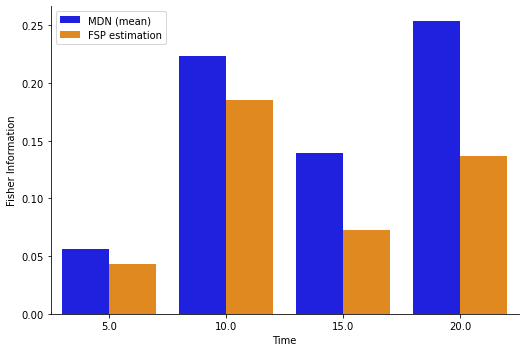

In [65]:
plot.expect_val_barplots(time_samples=np.array([5, 10, 15, 20]), 
                        params=X_test[1_000,1:].numpy(), 
                        time_windows=np.array([5, 10, 15, 20]),
                        models=(True, [model1, model2, model3], N_COMPS),
                        plot_fsp_result=(True, 
                                        propensities.stoich_mat, 
                                        propensities.propensities, 
                                        propensities.propensities_drv, 
                                        400, 
                                        propensities.init_state, 
                                        propensities.ind_species, 
                                        9, 
                                        1),
                        up_bound=200,
                        loss=None,
                        plot=('gradient', 8),
                        save=(False, 'CRN6_gradient9.pdf'))

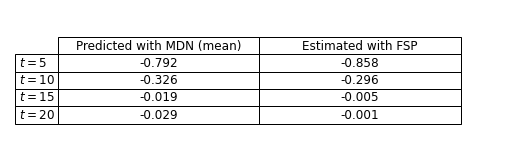

In [66]:
plot.expect_val_table(time_samples=np.array([5, 10, 15, 20]), 
                    params=X_test[1_000,1:].numpy(), 
                    time_windows=np.array([5, 10, 15, 20]),
                    models=(True, [model1, model2, model3], N_COMPS),
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv, 
                                    400, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    9, 
                                    1),
                    up_bound=200,
                    loss=None,
                    plot=('gradient', 9))

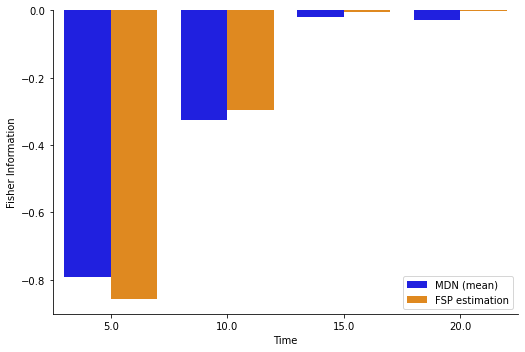

In [67]:
plot.expect_val_barplots(time_samples=np.array([5, 10, 15, 20]), 
                        params=X_test[1_000,1:].numpy(), 
                        time_windows=np.array([5, 10, 15, 20]),
                        models=(True, [model1, model2, model3], N_COMPS),
                        plot_fsp_result=(True, 
                                        propensities.stoich_mat, 
                                        propensities.propensities, 
                                        propensities.propensities_drv, 
                                        400, 
                                        propensities.init_state, 
                                        propensities.ind_species, 
                                        9, 
                                        1),
                        up_bound=200,
                        loss=None,
                        plot=('gradient', 9),
                        save=(False, 'CRN6_gradient10.pdf'))

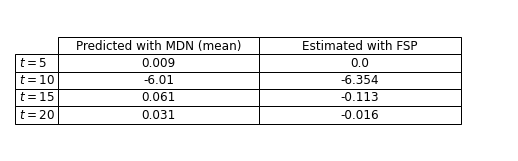

In [68]:
plot.expect_val_table(time_samples=np.array([5, 10, 15, 20]), 
                    params=X_test[1_000,1:].numpy(), 
                    time_windows=np.array([5, 10, 15, 20]),
                    models=(True, [model1, model2, model3], N_COMPS),
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv, 
                                    400, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    9, 
                                    1),
                    up_bound=200,
                    loss=None,
                    plot=('gradient', 10))

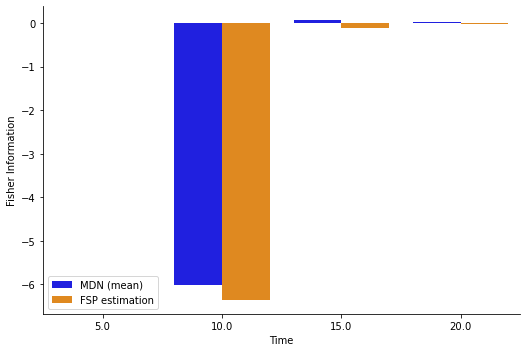

In [69]:
plot.expect_val_barplots(time_samples=np.array([5, 10, 15, 20]), 
                        params=X_test[1_000,1:].numpy(), 
                        time_windows=np.array([5, 10, 15, 20]),
                        models=(True, [model1, model2, model3], N_COMPS),
                        plot_fsp_result=(True, 
                                        propensities.stoich_mat, 
                                        propensities.propensities, 
                                        propensities.propensities_drv, 
                                        400, 
                                        propensities.init_state, 
                                        propensities.ind_species, 
                                        9, 
                                        1),
                        up_bound=200,
                        loss=None,
                        plot=('gradient', 10),
                        save=(False, 'CRN6_gradient11.pdf'))

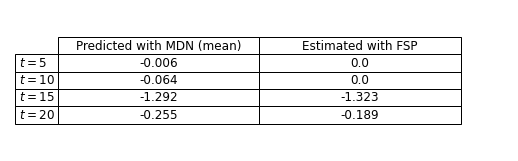

In [70]:
plot.expect_val_table(time_samples=np.array([5, 10, 15, 20]), 
                    params=X_test[1_000,1:].numpy(), 
                    time_windows=np.array([5, 10, 15, 20]),
                    models=(True, [model1, model2, model3], N_COMPS),
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv, 
                                    400, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    9, 
                                    1),
                    up_bound=200,
                    loss=None,
                    plot=('gradient', 11))

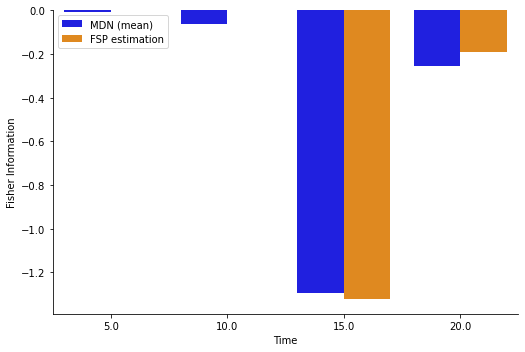

In [71]:
plot.expect_val_barplots(time_samples=np.array([5, 10, 15, 20]), 
                        params=X_test[1_000,1:].numpy(), 
                        time_windows=np.array([5, 10, 15, 20]),
                        models=(True, [model1, model2, model3], N_COMPS),
                        plot_fsp_result=(True, 
                                        propensities.stoich_mat, 
                                        propensities.propensities, 
                                        propensities.propensities_drv, 
                                        400, 
                                        propensities.init_state, 
                                        propensities.ind_species, 
                                        9, 
                                        1),
                        up_bound=200,
                        loss=None,
                        plot=('gradient', 11),
                        save=(False, 'CRN6_gradient12.pdf'))

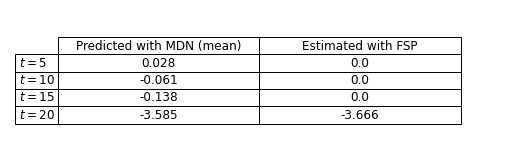

In [72]:
plot.expect_val_table(time_samples=np.array([5, 10, 15, 20]), 
                    params=X_test[1_000,1:].numpy(), 
                    time_windows=np.array([5, 10, 15, 20]),
                    models=(True, [model1, model2, model3], N_COMPS),
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv, 
                                    400, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    9, 
                                    1),
                    up_bound=200,
                    loss=None,
                    plot=('gradient', 12))

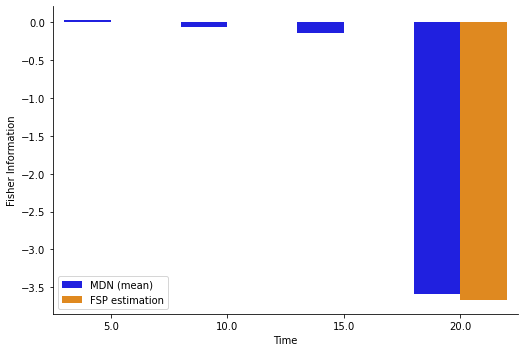

In [73]:
plot.expect_val_barplots(time_samples=np.array([5, 10, 15, 20]), 
                        params=X_test[1_000,1:].numpy(), 
                        time_windows=np.array([5, 10, 15, 20]),
                        models=(True, [model1, model2, model3], N_COMPS),
                        plot_fsp_result=(True, 
                                        propensities.stoich_mat, 
                                        propensities.propensities, 
                                        propensities.propensities_drv, 
                                        400, 
                                        propensities.init_state, 
                                        propensities.ind_species, 
                                        9, 
                                        1),
                        up_bound=200,
                        loss=None,
                        plot=('gradient', 12),
                        save=(False, 'CRN6_gradient13.pdf'))

## Control

In [6]:
def loss1(x):
    return (x-1)**2

def loss2(x):
    return (x-2)**2

def loss3(x):
    return (x-3)**2

def loss4(x):
    return (x-4)**2

def loss1_5(x):
    return (x-1.5)**2

In [13]:
crn = simulation.CRN(stoichiometry_mat=propensities.stoich_mat,
                    propensities=propensities.propensities,
                    propensities_drv=propensities.propensities_drv,
                    init_state=propensities.init_state,
                    n_fixed_params=9,
                    n_control_params=1,
                    seed=0)
domain = np.stack([np.array([1e-5, 3.])]*4)
fixed_params = np.array([1, 1, 1, 1, 1, 1, 2.1, 3, 1])
time_windows=np.array([5, 10, 15, 20])

### Constant targets

Optimising ...:   0%|          | 0/30000 [00:00<?, ?it/s]

Optimising ...:   1%|▏         | 393/30000 [00:04<05:59, 82.46it/s]


Time:  4.805961847305298
Number of iterations:  393
Control parameters:  [0.75178721 0.77482652 0.79790701 0.81188093]
Final loss:  3.9477754398831166e-11


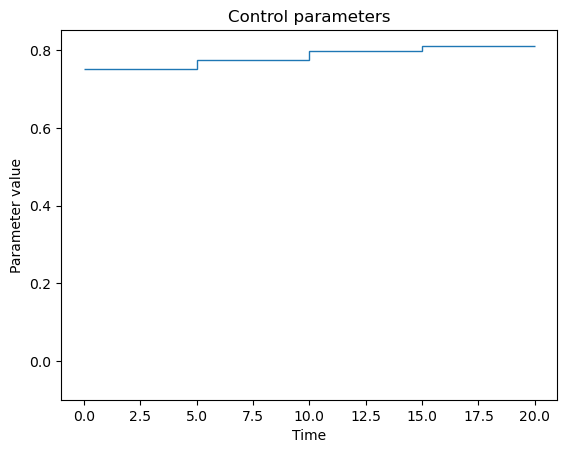

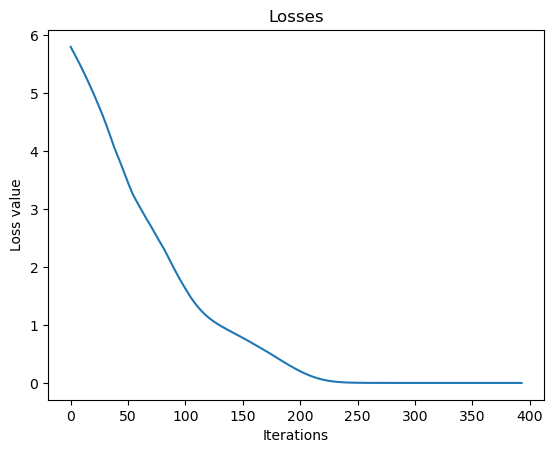

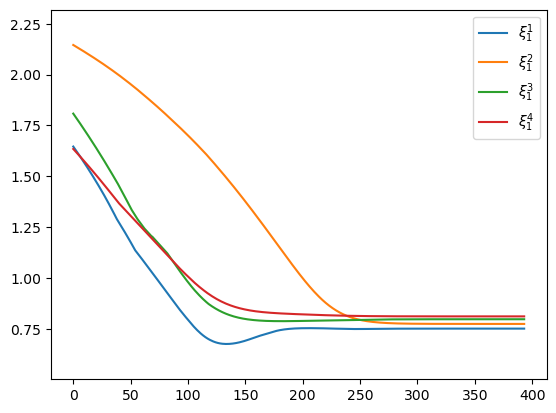

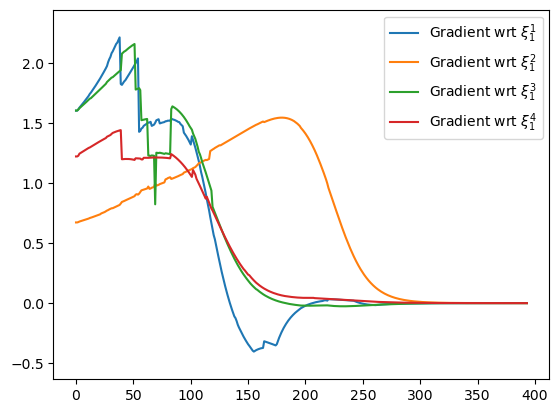

Final exact loss:  0.037490640000000006


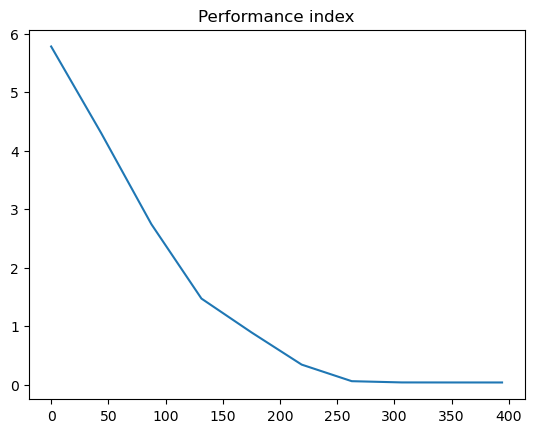

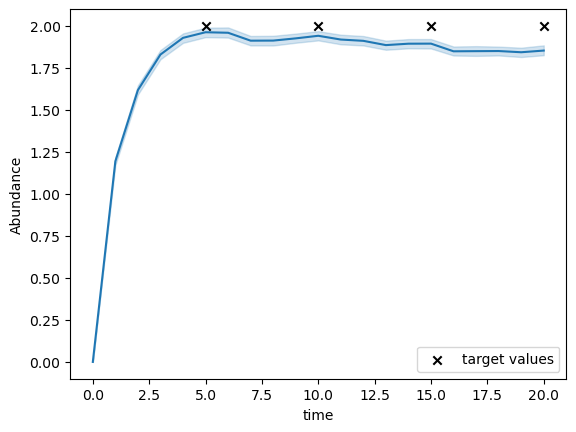

In [14]:
training_pgd.pgdMDN(crn=crn,
                    model=model2,
                    domain=domain,
                    fixed_params=fixed_params,
                    time_windows=time_windows,
                    loss=loss2,
                    gamma=0.005,
                    n_iter=30_000,
                    eps=1e-9,
                    ind_species=propensities.ind_species,
                    targets=np.array([[5., 2.], [10., 2.], [15., 2.], [20., 2.]]),
                    crn_name='ctrl_toggleswitch',
                    directory='gradient_descent/MDN/constant_targets/target2/',
                    save=(False, ['gradient_descent/MDN/constant_targets/target2/control_values', 
                                'gradient_descent/MDN/constant_targets/target2/experimental_losses', 
                                'gradient_descent/MDN/constant_targets/target2/parameters', 
                                'gradient_descent/MDN/constant_targets/target2/gradients_losses', 
                                'gradient_descent/MDN/constant_targets/target2/real_losses', 
                                'gradient_descent/MDN/constant_targets/target2/exp_results']))

Optimising ...:   0%|          | 0/30000 [00:00<?, ?it/s]

Optimising ...:   1%|▏         | 393/30000 [00:04<05:02, 98.03it/s] 


Time:  4.080761909484863
Number of iterations:  393
Control parameters:  [0.75178721 0.77482652 0.79790701 0.81188093]
Final loss:  3.9477754398831166e-11


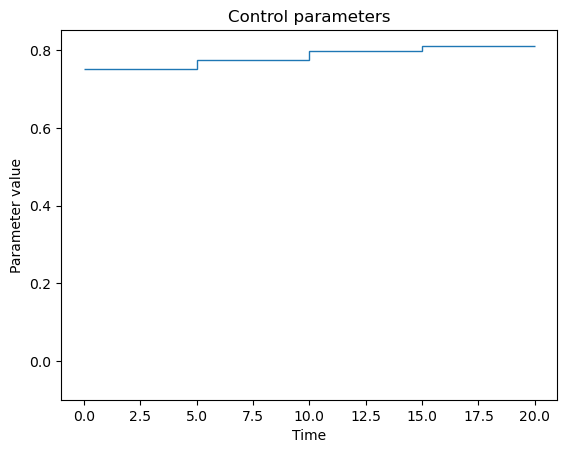

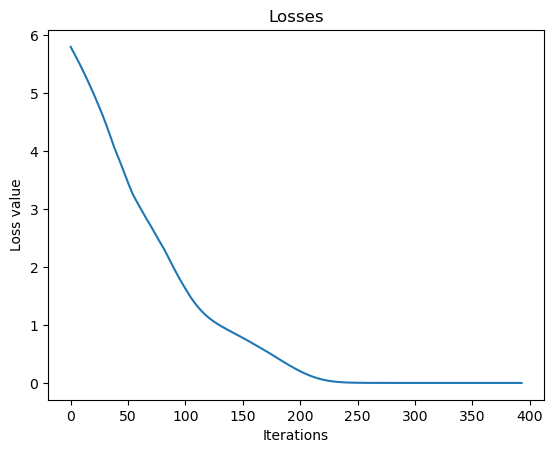

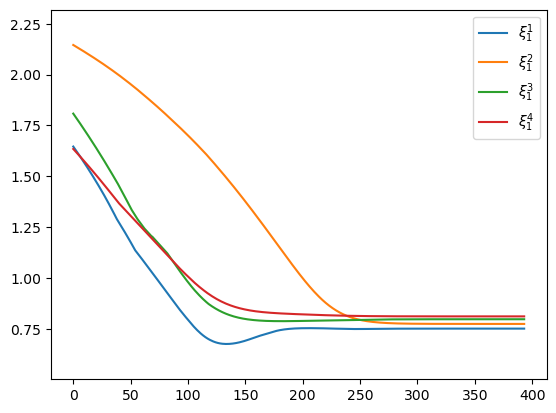

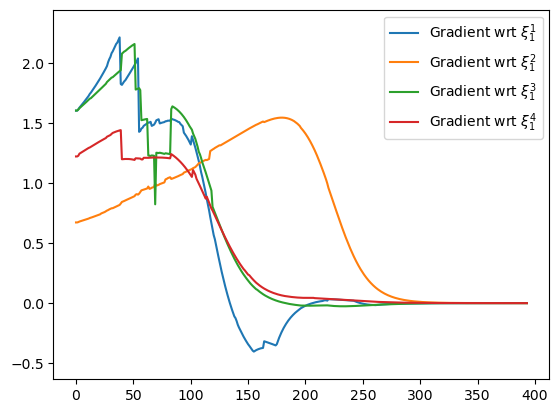

Final exact loss:  0.037490640000000006


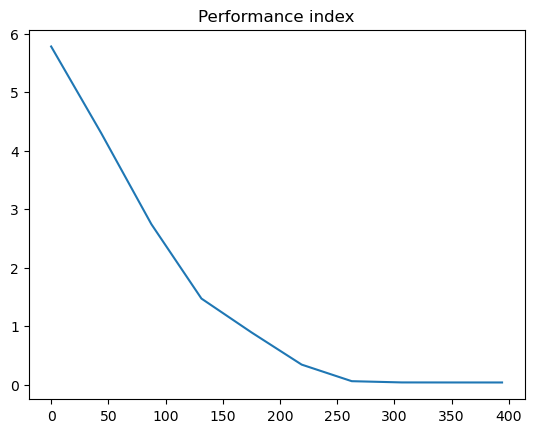

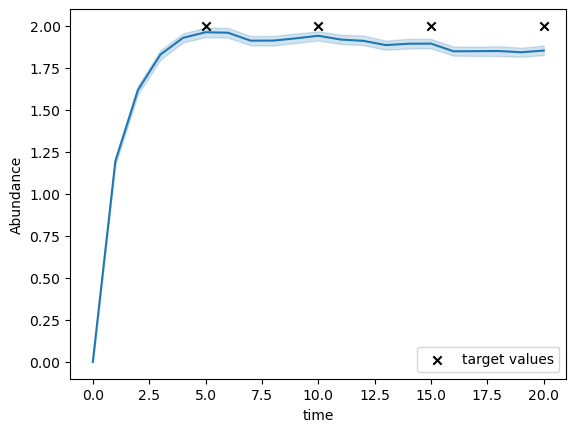

In [10]:
# seed 0
training_pgd.pgdMDN(crn=crn,
                    model=model2,
                    domain=domain,
                    fixed_params=fixed_params,
                    time_windows=time_windows,
                    loss=loss2,
                    gamma=0.005,
                    n_iter=30_000,
                    eps=1e-9,
                    ind_species=propensities.ind_species,
                    targets=np.array([[5., 2.], [10., 2.], [15., 2.], [20., 2.]]),
                    crn_name='ctrl_toggleswitch',
                    directory='gradient_descent/MDN/constant_targets/target2/',
                    save=(False, ['gradient_descent/MDN/constant_targets/target2/control_values', 
                                'gradient_descent/MDN/constant_targets/target2/experimental_losses', 
                                'gradient_descent/MDN/constant_targets/target2/parameters', 
                                'gradient_descent/MDN/constant_targets/target2/gradients_losses', 
                                'gradient_descent/MDN/constant_targets/target2/real_losses', 
                                'gradient_descent/MDN/constant_targets/target2/exp_results']))

Optimising ...: 100%|██████████| 30000/30000 [05:21<00:00, 93.42it/s] 


Time:  321.3055250644684
Number of iterations:  30000
Control parameters:  [0.47273265 0.52241515 0.52875354 0.53319609]
Final loss:  1.67995040101232e-09


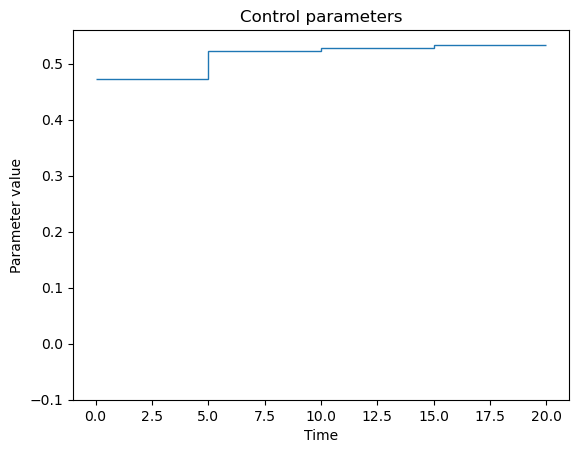

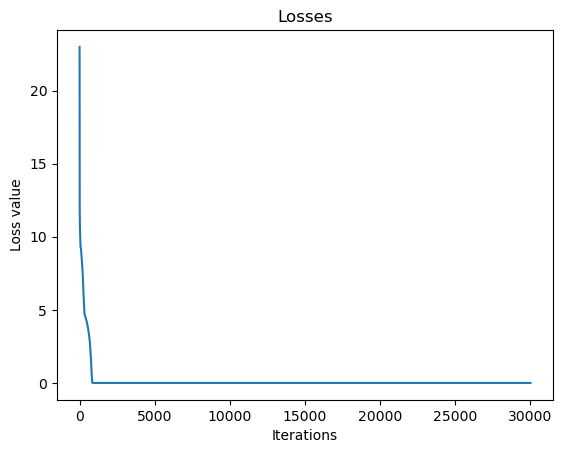

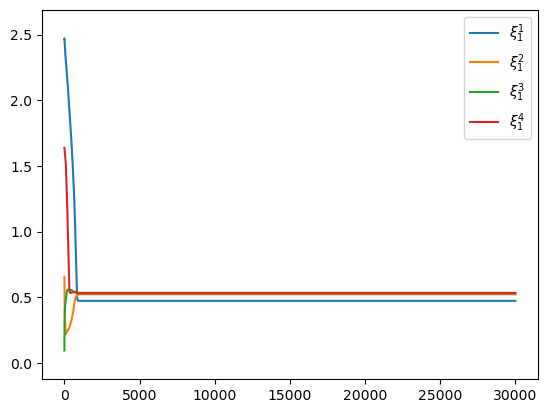

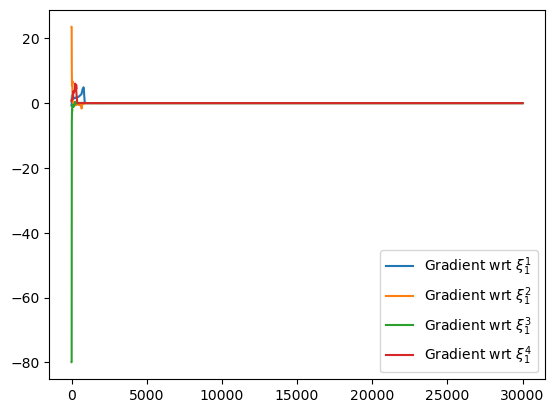

Final exact loss:  0.013821269999999972


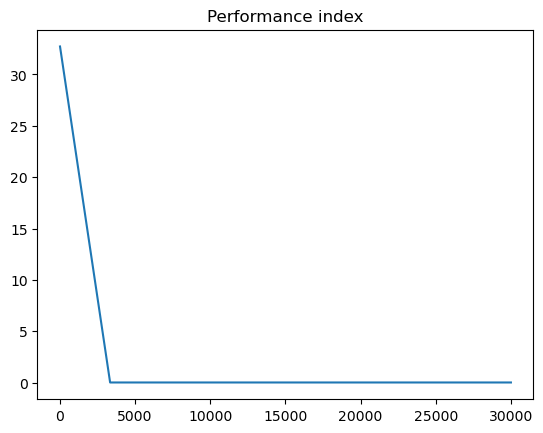

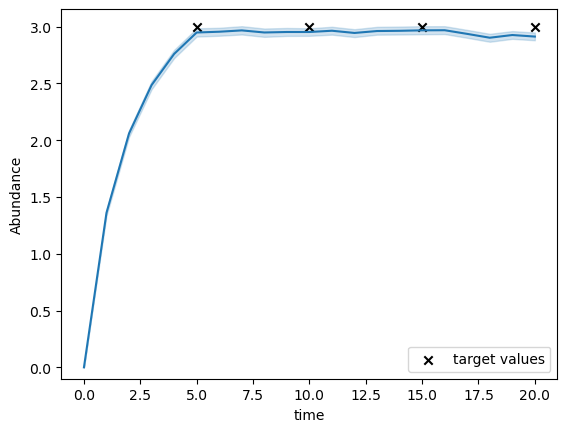

In [15]:
training_pgd.pgdMDN(crn=crn,
                    model=model2,
                    domain=domain,
                    fixed_params=fixed_params,
                    time_windows=time_windows,
                    loss=loss3,
                    gamma=0.001,
                    n_iter=30_000,
                    eps=1e-9,
                    ind_species=propensities.ind_species,
                    targets=np.array([[5., 3.], [10., 3.], [15., 3.], [20., 3.]]),
                    crn_name='ctrl_toggleswitch',
                    directory='gradient_descent/MDN/constant_targets/target3/',
                    save=(False, ['gradient_descent/MDN/constant_targets/target3/control_values', 
                                'gradient_descent/MDN/constant_targets/target3/experimental_losses', 
                                'gradient_descent/MDN/constant_targets/target3/parameters', 
                                'gradient_descent/MDN/constant_targets/target3/gradients_losses', 
                                'gradient_descent/MDN/constant_targets/target3/real_losses', 
                                'gradient_descent/MDN/constant_targets/target3/exp_results']))

Optimising ...:  58%|█████▊    | 17383/30000 [02:17<01:39, 126.78it/s]


Time:  137.33930897712708
Number of iterations:  17383
Control parameters:  [0.29288271 0.40362453 0.39697542 0.40581732]
Final loss:  4.045944024255732e-09


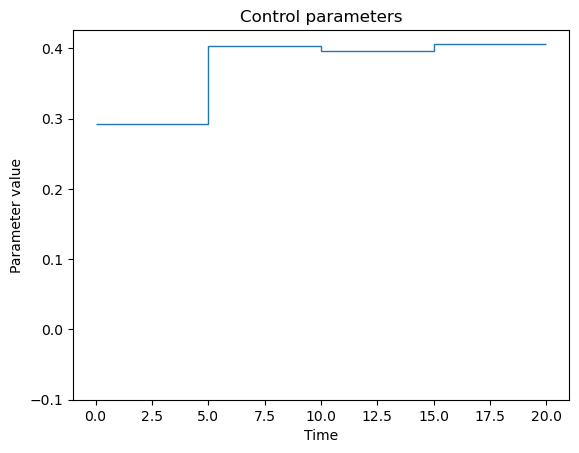

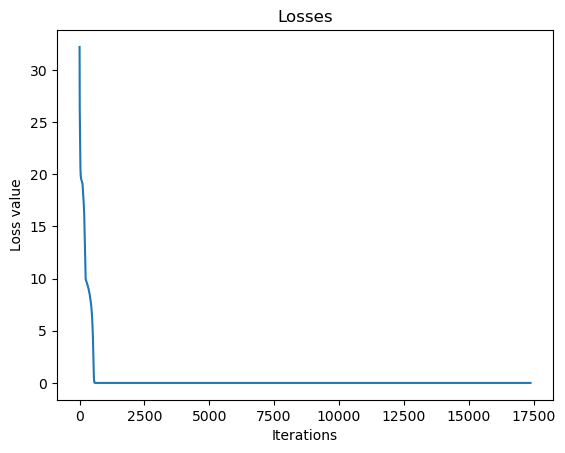

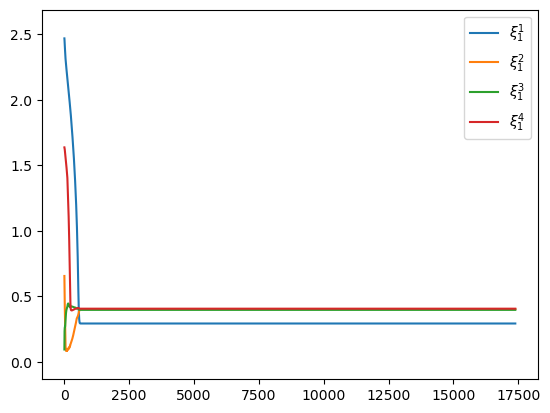

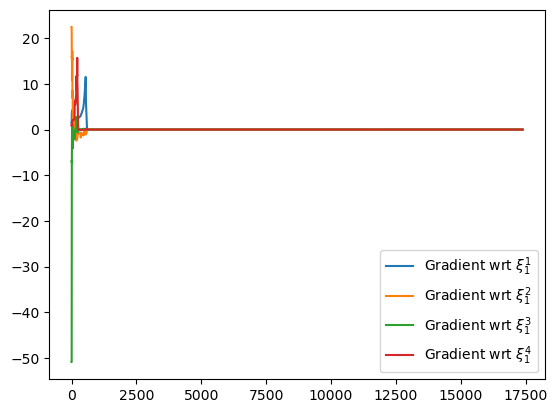

Final exact loss:  0.035135899999999914


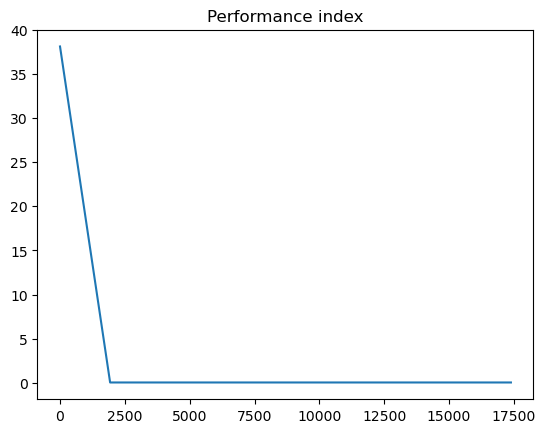

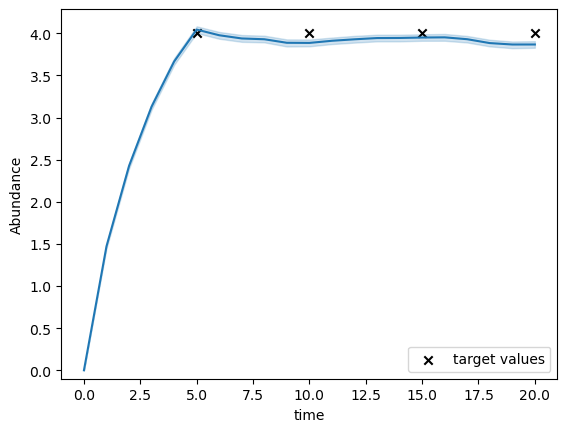

In [16]:
training_pgd.pgdMDN(crn=crn,
                    model=model2,
                    domain=domain,
                    fixed_params=fixed_params,
                    time_windows=time_windows,
                    loss=loss4,
                    gamma=0.001,
                    n_iter=30_000,
                    eps=1e-8,
                    ind_species=propensities.ind_species,
                    targets=np.array([[5., 4.], [10., 4.], [15., 4.], [20., 4.]]),
                    crn_name='ctrl_toggleswitch',
                    directory='gradient_descent/MDN/constant_targets/target4/',
                    save=(False, ['gradient_descent/MDN/constant_targets/target4/control_values', 
                                'gradient_descent/MDN/constant_targets/target4/experimental_losses', 
                                'gradient_descent/MDN/constant_targets/target4/parameters', 
                                'gradient_descent/MDN/constant_targets/target4/gradients_losses', 
                                'gradient_descent/MDN/constant_targets/target4/real_losses', 
                                'gradient_descent/MDN/constant_targets/target4/exp_results']))

Optimising ...:  11%|█         | 5453/50000 [00:46<06:17, 117.99it/s]


Time:  46.473304986953735
Number of iterations:  5453
Control parameters:  [1.06587681 1.03033523 1.07579693 1.06973566]
Final loss:  1.4678249726784998e-08


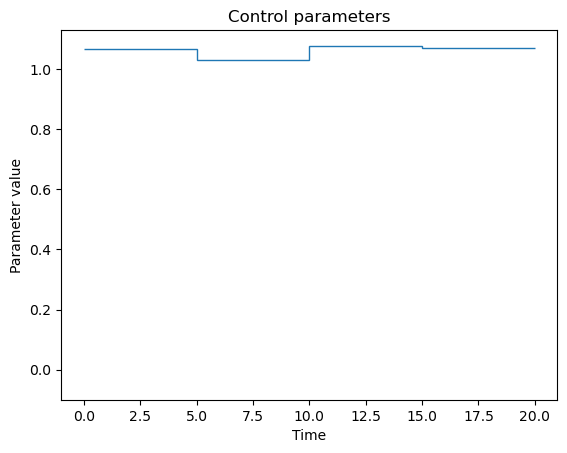

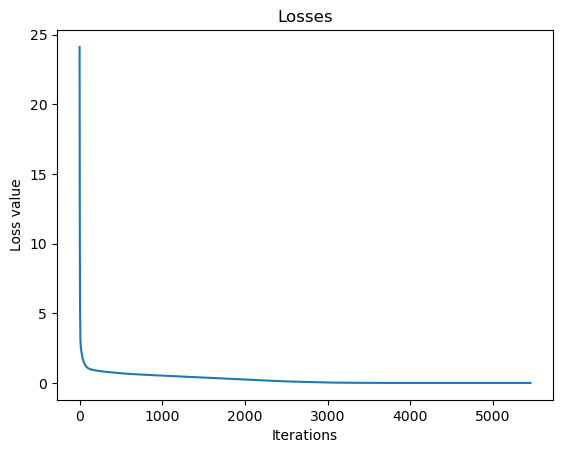

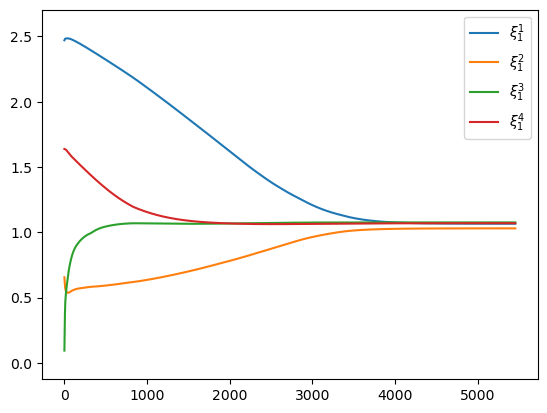

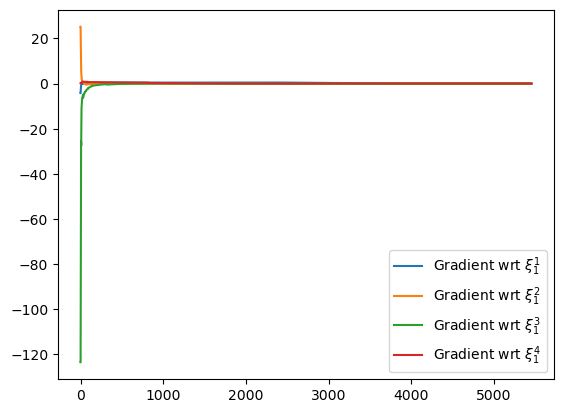

Final exact loss:  0.05569581


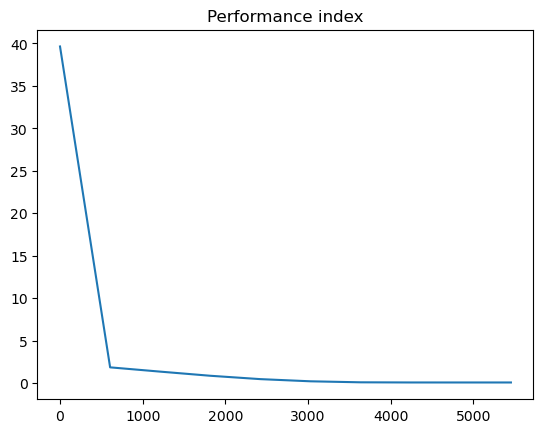

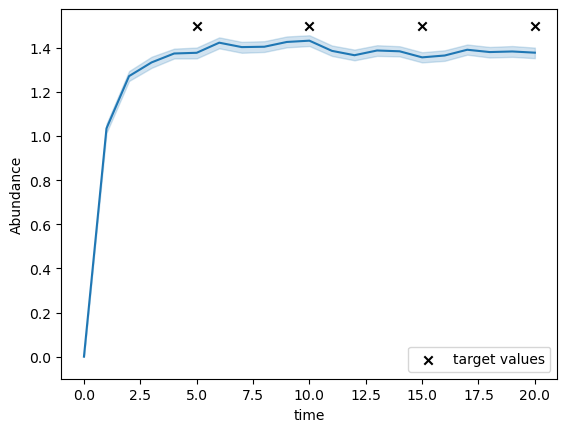

In [17]:
training_pgd.pgdMDN(crn=crn,
                    model=model2,
                    domain=domain,
                    fixed_params=fixed_params,
                    time_windows=time_windows,
                    loss=loss1_5,
                    gamma=0.001,
                    n_iter=50_000,
                    eps=1e-7,
                    ind_species=propensities.ind_species,
                    targets=np.array([[5., 1.5], [10., 1.5], [15., 1.5], [20., 1.5]]),
                    crn_name='ctrl_toggleswitch',
                    directory='gradient_descent/MDN/constant_targets/target15/',
                    save=(False, ['gradient_descent/MDN/constant_targets/target15/control_values', 
                                'gradient_descent/MDN/constant_targets/target15/experimental_losses', 
                                'gradient_descent/MDN/constant_targets/target15/parameters', 
                                'gradient_descent/MDN/constant_targets/target15/gradients_losses', 
                                'gradient_descent/MDN/constant_targets/target15/real_losses', 
                                'gradient_descent/MDN/constant_targets/target15/exp_results']))

Optimising ...:   3%|▎         | 506/20000 [00:03<02:28, 131.19it/s]


Time:  4.242192268371582
Number of iterations:  506
Control parameters:  [1.02717635 0.74892661 0.50630964 0.39348829]
Final loss:  6.253856099647237e-09


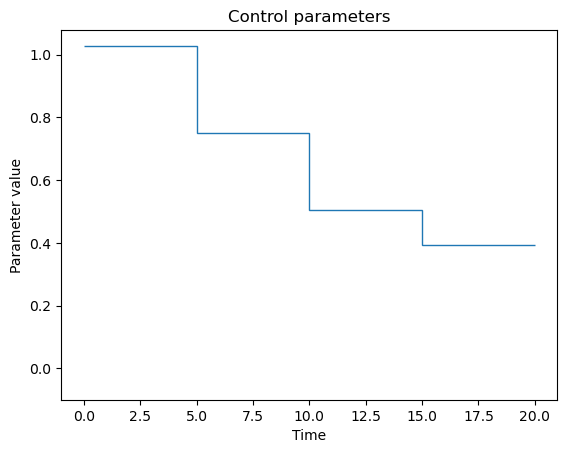

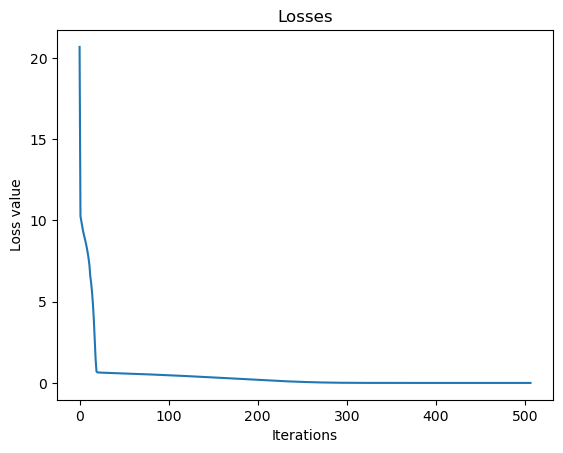

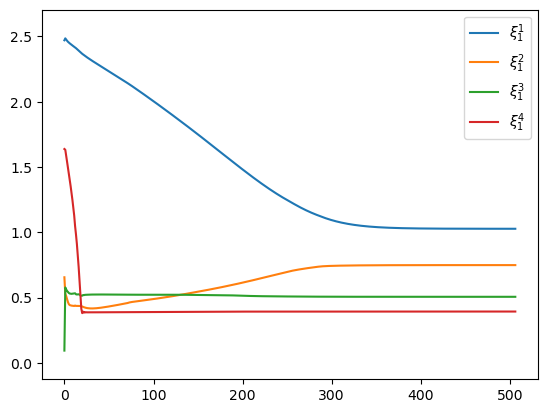

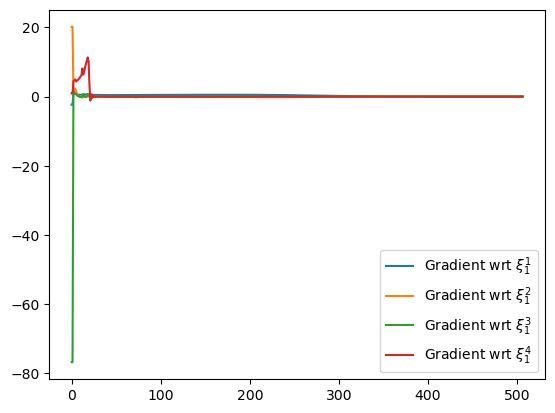

Final exact loss:  0.034758429999999924


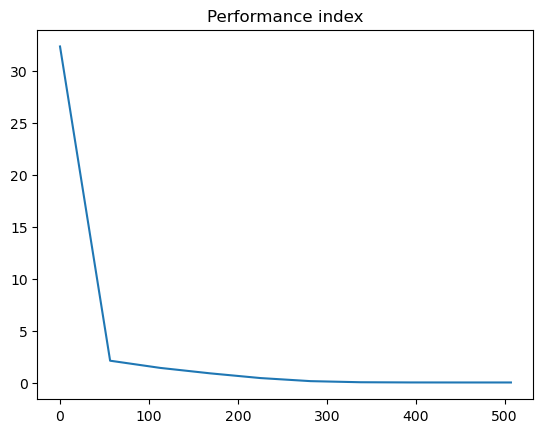

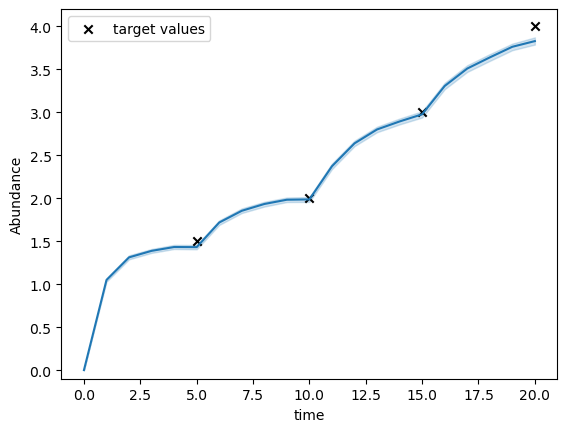

In [18]:
training_pgd.pgdMDN(crn=crn,
                    model=model2,
                    domain=domain,
                    fixed_params=fixed_params,
                    time_windows=time_windows,
                    loss=[loss1_5, loss2, loss3, loss4],
                    gamma=0.01,
                    n_iter=20_000,
                    eps=1e-7,
                    ind_species=propensities.ind_species,
                    targets=np.array([[5., 1.5], [10., 2.], [15., 3.], [20., 4.]]),
                    crn_name='ctrl_toggleswitch',
                    directory='gradient_descent/MDN/varying_targets/target15234/',
                    save=(False, ['gradient_descent/MDN/varying_targets/target15234/control_values', 
                                'gradient_descent/MDN/varying_targets/target15234/experimental_losses', 
                                'gradient_descent/MDN/varying_targets/target15234/parameters', 
                                'gradient_descent/MDN/varying_targets/target15234/gradients_losses', 
                                'gradient_descent/MDN/varying_targets/target15234/real_losses', 
                                'gradient_descent/MDN/varying_targets/target15234/exp_results']))

Optimising ...:   3%|▎         | 1309/50000 [00:10<06:35, 122.98it/s]


Time:  10.872297048568726
Number of iterations:  1309
Control parameters:  [0.31014096 0.51149142 0.86150924 1.54426486]
Final loss:  4.6827071997768144e-08


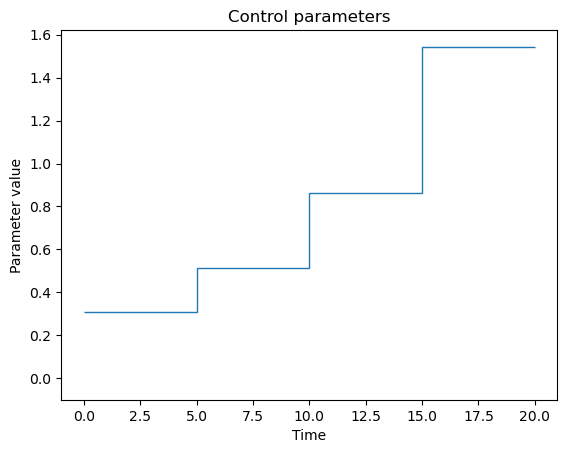

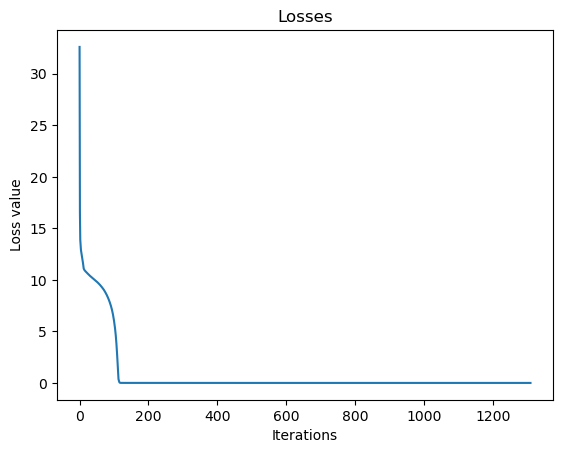

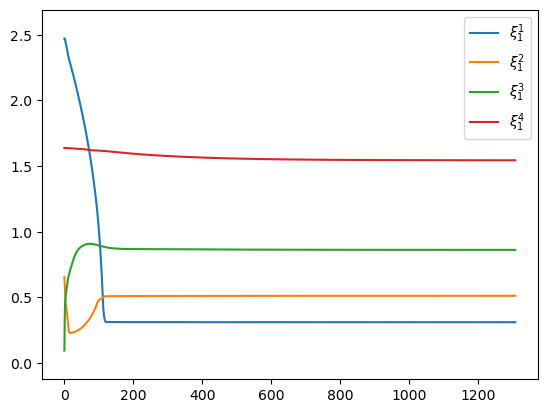

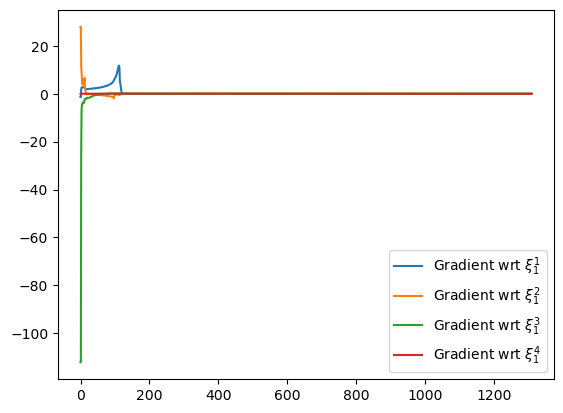

Final exact loss:  0.06701631000000001


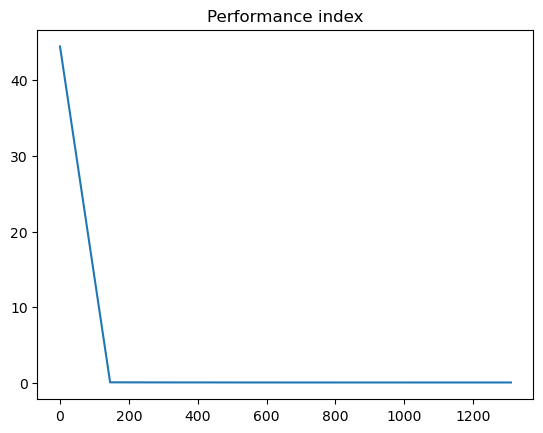

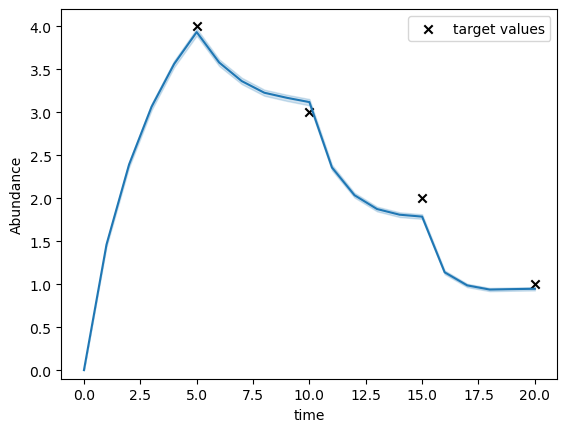

In [19]:
training_pgd.pgdMDN(crn=crn,
                    model=model2,
                    domain=domain,
                    fixed_params=fixed_params,
                    time_windows=time_windows,
                    loss=[loss4, loss3, loss2, loss1],
                    gamma=0.005,
                    n_iter=50_000,
                    eps=1e-7,
                    ind_species=propensities.ind_species,
                    targets=np.array([[5., 4.], [10., 3.], [15., 2.], [20., 1.]]),
                    crn_name='ctrl_toggleswitch',
                    directory='gradient_descent/MDN/varying_targets/target43215/',
                    save=(False, ['gradient_descent/MDN/varying_targets/target43215/control_values', 
                                'gradient_descent/MDN/varying_targets/target43215/experimental_losses', 
                                'gradient_descent/MDN/varying_targets/target43215/parameters', 
                                'gradient_descent/MDN/varying_targets/target43215/gradients_losses', 
                                'gradient_descent/MDN/varying_targets/target43215/real_losses', 
                                'gradient_descent/MDN/varying_targets/target43215/exp_results']))

Optimising ...:   3%|▎         | 1622/50000 [00:12<06:25, 125.35it/s]


Time:  13.191601753234863
Number of iterations:  1622
Control parameters:  [0.23771634 1.52954821 0.36454515 1.52226766]
Final loss:  4.628455485544691e-08


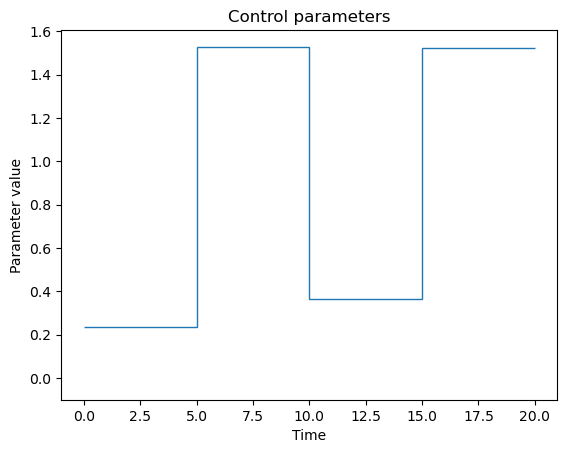

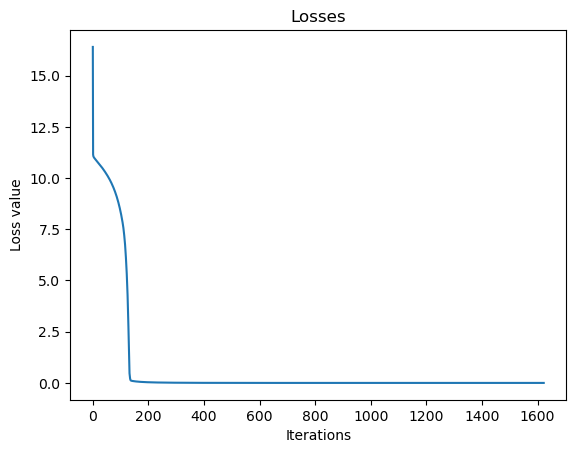

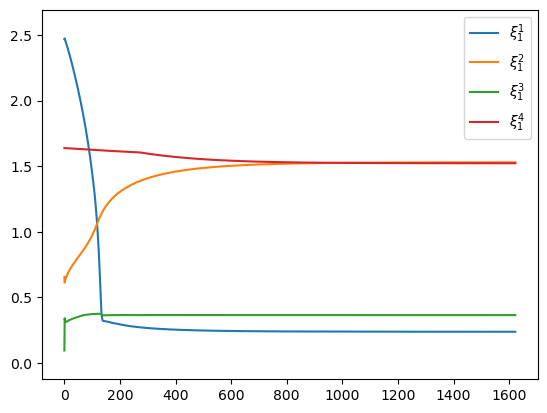

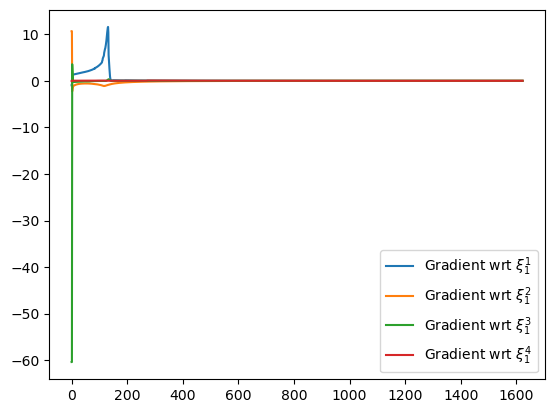

Final exact loss:  0.38812059


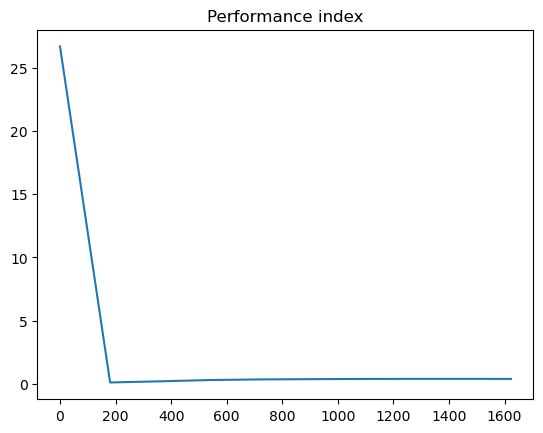

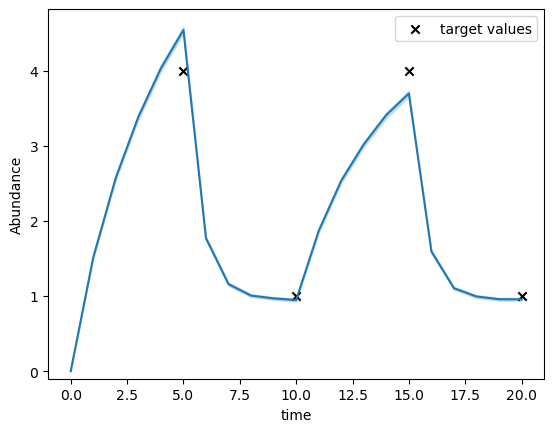

In [20]:
training_pgd.pgdMDN(crn=crn,
                    model=model2,
                    domain=domain,
                    fixed_params=fixed_params,
                    time_windows=time_windows,
                    loss=[loss4, loss1, loss4, loss1],
                    gamma=0.005,
                    n_iter=50_000,
                    eps=1e-7,
                    ind_species=propensities.ind_species,
                    targets=np.array([[5., 4.], [10., 1.], [15., 4.], [20., 1.]]),
                    crn_name='ctrl_toggleswitch',
                    directory='gradient_descent/MDN/varying_targets/target4141/',
                    save=(False, ['gradient_descent/MDN/varying_targets/target4141/control_values', 
                                'gradient_descent/MDN/varying_targets/target4141/experimental_losses', 
                                'gradient_descent/MDN/varying_targets/target4141/parameters', 
                                'gradient_descent/MDN/varying_targets/target4141/gradients_losses', 
                                'gradient_descent/MDN/varying_targets/target4141/real_losses', 
                                'gradient_descent/MDN/varying_targets/target4141/exp_results']))

Optimising ...:   1%|          | 461/50000 [00:03<06:11, 133.36it/s]


Time:  3.820884943008423
Number of iterations:  461
Control parameters:  [0.74501854 0.50670794 0.52793205 0.39304104]
Final loss:  1.2877436006419885e-08


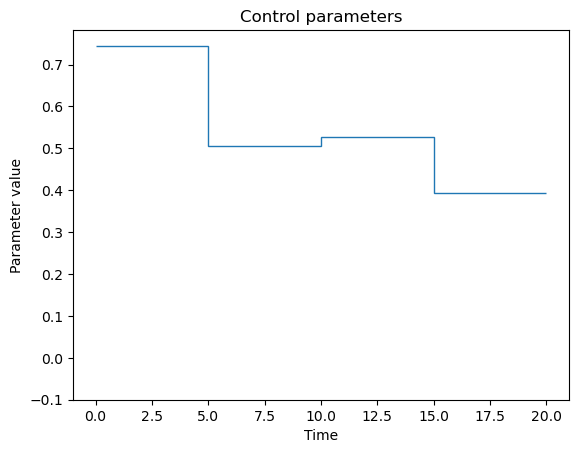

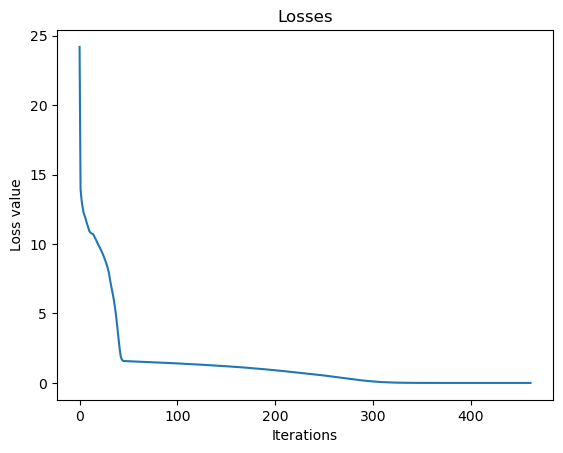

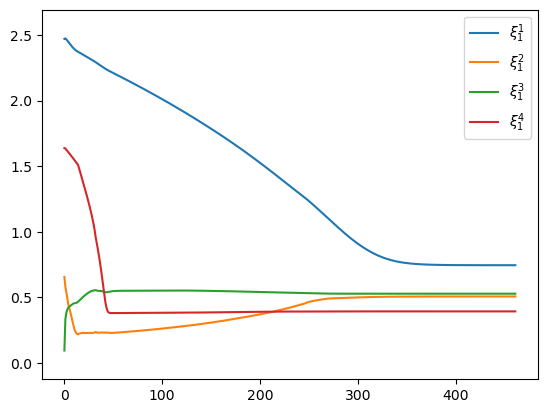

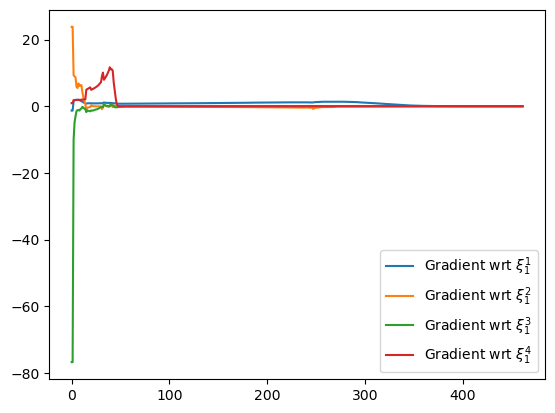

Final exact loss:  0.040040019999999954


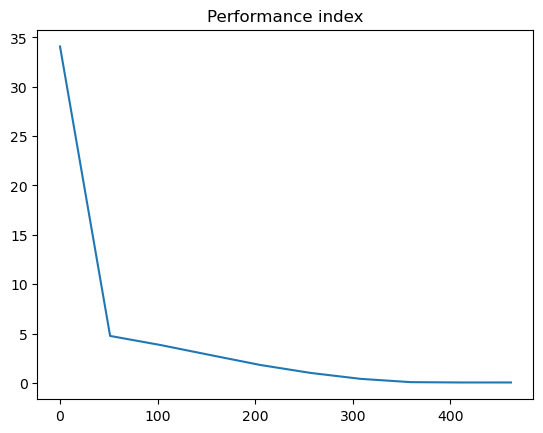

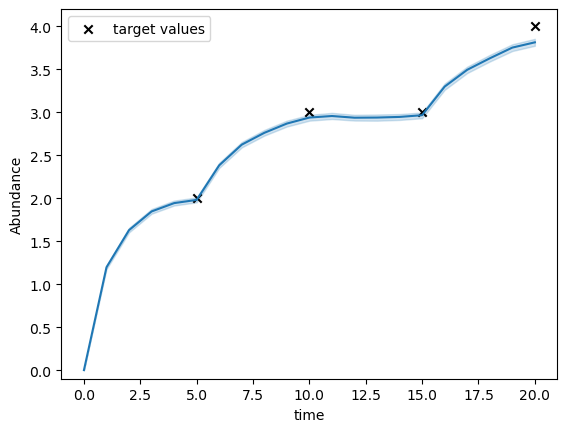

In [21]:
training_pgd.pgdMDN(crn=crn,
                    model=model2,
                    domain=domain,
                    fixed_params=fixed_params,
                    time_windows=time_windows,
                    loss=[loss2, loss3, loss3, loss4],
                    gamma=0.005,
                    n_iter=50_000,
                    eps=1e-7,
                    ind_species=propensities.ind_species,
                    targets=np.array([[5., 2.], [10., 3.], [15., 3.], [20., 4.]]),
                    crn_name='ctrl_toggleswitch',
                    directory='gradient_descent/MDN/varying_targets/target2334/',
                    save=(False, ['gradient_descent/MDN/varying_targets/target2334/control_values', 
                                'gradient_descent/MDN/varying_targets/target2334/experimental_losses', 
                                'gradient_descent/MDN/varying_targets/target2334/parameters', 
                                'gradient_descent/MDN/varying_targets/target2334/gradients_losses', 
                                'gradient_descent/MDN/varying_targets/target2334/real_losses', 
                                'gradient_descent/MDN/varying_targets/target2334/exp_results']))

Optimising ...:   6%|▌         | 3098/50000 [00:23<05:50, 133.72it/s]


Time:  23.394861221313477
Number of iterations:  3098
Control parameters:  [1.5930963  0.58988112 0.51730332 0.39215111]
Final loss:  4.703142408857275e-08


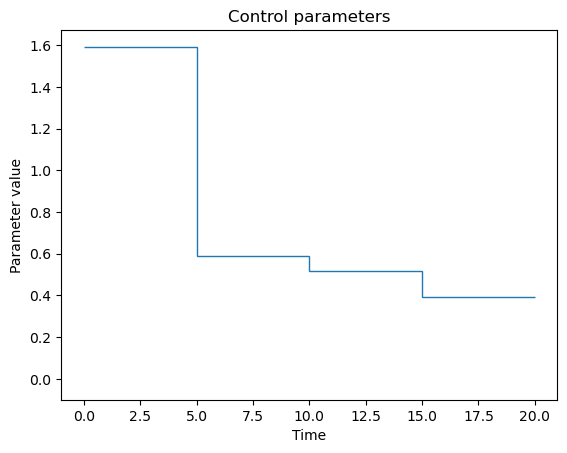

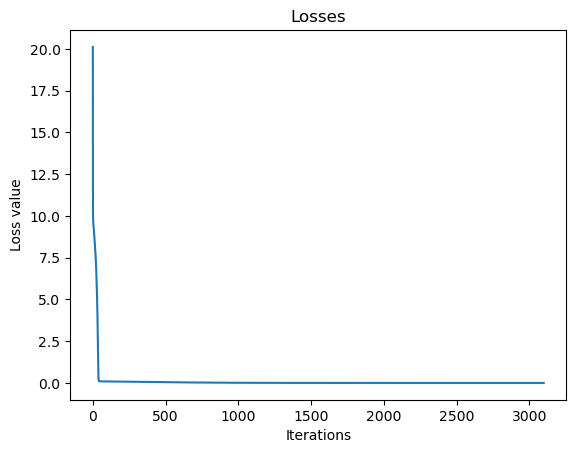

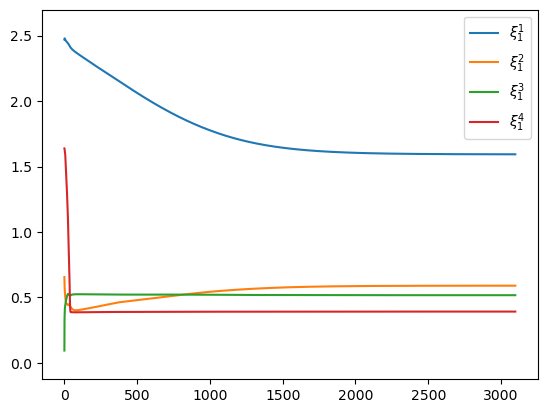

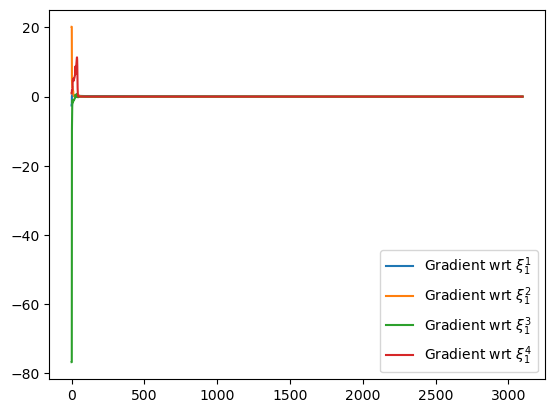

Final exact loss:  0.25395746999999996


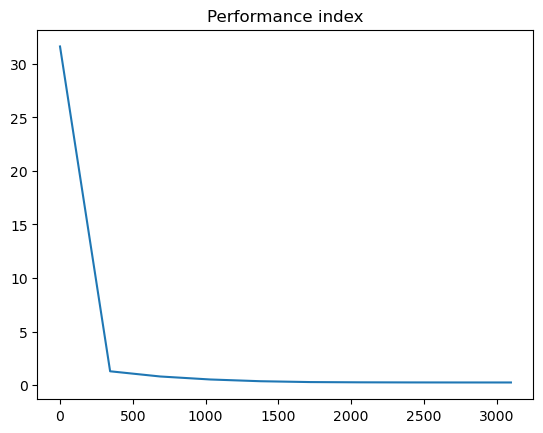

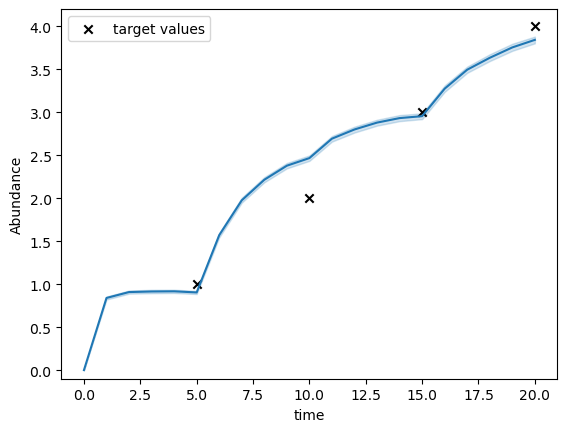

In [22]:
training_pgd.pgdMDN(crn=crn,
                    model=model2,
                    domain=domain,
                    fixed_params=fixed_params,
                    time_windows=time_windows,
                    loss=[loss1, loss2, loss3, loss4],
                    gamma=0.005,
                    n_iter=50_000,
                    eps=1e-7,
                    ind_species=propensities.ind_species,
                    targets=np.array([[5., 1.], [10., 2.], [15., 3.], [20., 4.]]),
                    crn_name='ctrl_toggleswitch',
                    directory='gradient_descent/MDN/varying_targets/target1234/',
                    save=(False, ['gradient_descent/MDN/varying_targets/target1234/control_values', 
                                'gradient_descent/MDN/varying_targets/target1234/experimental_losses', 
                                'gradient_descent/MDN/varying_targets/target1234/parameters', 
                                'gradient_descent/MDN/varying_targets/target1234/gradients_losses', 
                                'gradient_descent/MDN/varying_targets/target1234/real_losses', 
                                'gradient_descent/MDN/varying_targets/target1234/exp_results']))

Optimising ...:   6%|▌         | 1815/30000 [00:14<03:51, 121.69it/s]


Time:  15.370028018951416
Number of iterations:  1815
Control parameters:  [0.31881964 0.53002608 1.56367467 0.20484082]
Final loss:  3.335202336529619e-08


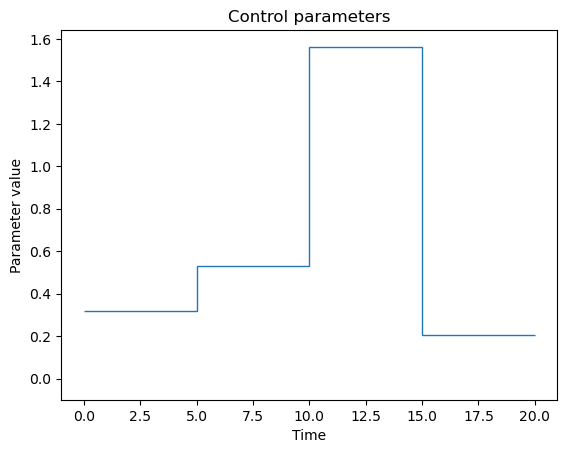

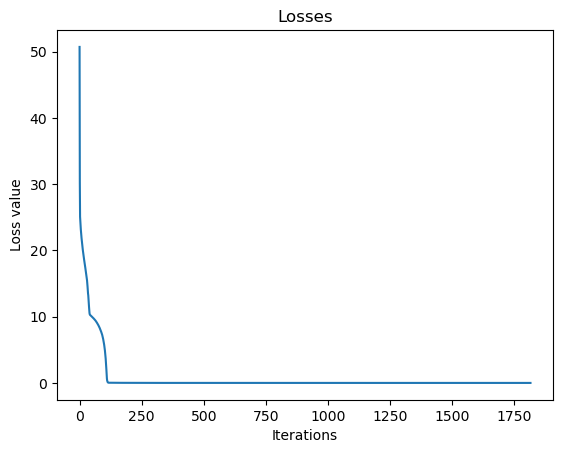

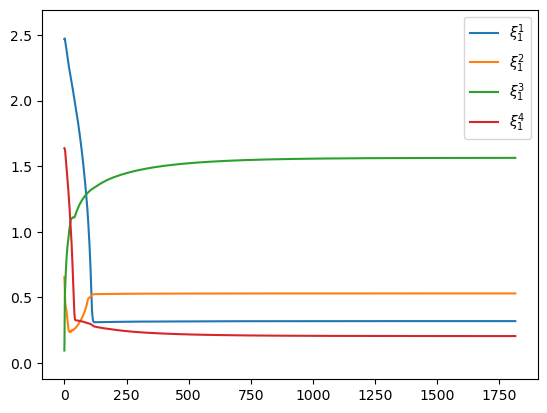

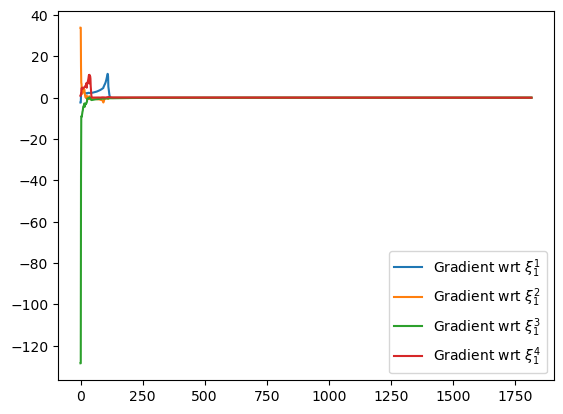

Final exact loss:  1.3208092999999992


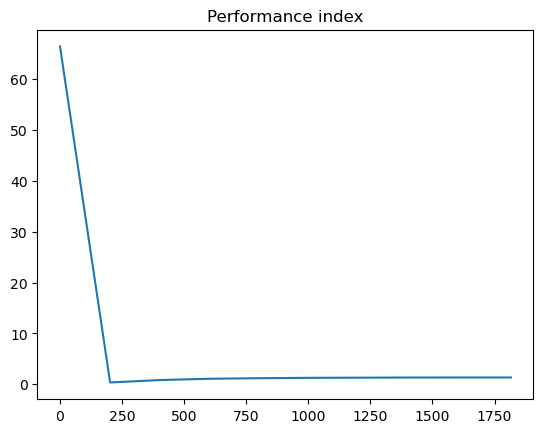

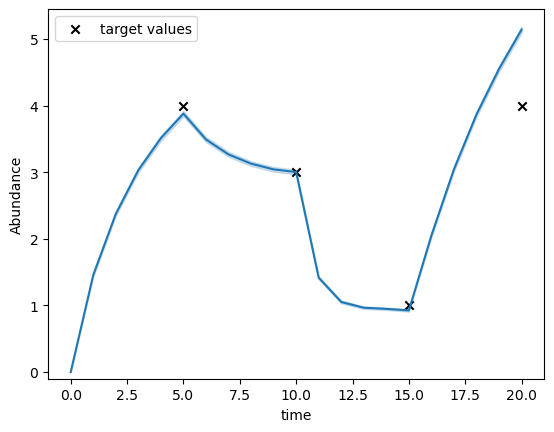

In [23]:
training_pgd.pgdMDN(crn=crn,
                    model=model2,
                    domain=domain,
                    fixed_params=fixed_params,
                    time_windows=time_windows,
                    loss=[loss4, loss3, loss1, loss4],
                    gamma=0.005,
                    n_iter=30_000,
                    eps=1e-7,
                    ind_species=propensities.ind_species,
                    targets=np.array([[5., 4.], [10., 3.], [15., 1.], [20., 4.]]),
                    crn_name='ctrl_toggleswitch',
                    directory='gradient_descent/MDN/varying_targets/target4314/',
                    save=(False, ['gradient_descent/MDN/varying_targets/target4314/control_values', 
                                'gradient_descent/MDN/varying_targets/target4314/experimental_losses', 
                                'gradient_descent/MDN/varying_targets/target4314/parameters', 
                                'gradient_descent/MDN/varying_targets/target4314/gradients_losses', 
                                'gradient_descent/MDN/varying_targets/target4314/real_losses', 
                                'gradient_descent/MDN/varying_targets/target4314/exp_results']))